In [135]:
!nvidia-smi

Sat Nov 15 15:55:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.124.06             Driver Version: 570.124.06     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          On  |   00000000:07:00.0 Off |                   On |
| N/A   36C    P0             94W /  400W |                  N/A   |     N/A      Default |
|                                         |                        |              Enabled |
+-----------------------------------------+-----

In [4]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /home/jovyan


In [4]:
!pip install -q 'git+https://github.com/facebookresearch/segment-anything.git'

In [5]:
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision==0.23.0

In [6]:
!mkdir -p {HOME}/weights
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -P {HOME}/weights

In [5]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

/home/jovyan/weights/sam_vit_h_4b8939.pth ; exist: True


In [66]:
# MODIFIED CELL - Data Directory Setup
!mkdir -p {HOME}/data
!mkdir -p {HOME}/outputs

# Optional: Keep dog images for comparison/testing
# !wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg -P {HOME}/data

print("✓ Data and outputs directories created")
print(f"Please upload F1 images to: {HOME}/data/")

✓ Data and outputs directories created
Please upload F1 images to: /home/jovyan/data/


In [6]:
import os

# Define the Home and Data directory paths
HOME = os.getcwd() # Or wherever your project's home directory is
DATA_DIR = os.path.join(HOME, "data")

# --- Step 1: Create the 'data' directory if it doesn't exist ---
os.makedirs(DATA_DIR, exist_ok=True)
print(f"Directory set up: {DATA_DIR}")
print("---")

# --- Step 2: Define the expected filenames ---
baseline_file = "f1_2016_baseline.jpg"
current_file = "f1_2025_current.jpg"

# --- Step 3: Instruction for the user ---
print("👉 Action Required: Please manually place the following two image files")
print(f"   into this directory: **{DATA_DIR}**")
print(f"   - {baseline_file}")
print(f"   - {current_file}")
print("---")

# --- Step 4: Verification (Run this cell *after* placing the files) ---
print("Verifying files are in place...")
baseline_path = os.path.join(DATA_DIR, baseline_file)
current_path = os.path.join(DATA_DIR, current_file)

if os.path.exists(baseline_path) and os.path.exists(current_path):
    print("✅ Success! Both image files have been found in the 'data' directory.")
else:
    print("❌ Error: One or both files are missing. Please check the 'data' folder.")

Directory set up: /home/jovyan/data
---
👉 Action Required: Please manually place the following two image files
   into this directory: **/home/jovyan/data**
   - f1_2016_baseline.jpg
   - f1_2025_current.jpg
---
Verifying files are in place...
✅ Success! Both image files have been found in the 'data' directory.


In [7]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [9]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [10]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [11]:
# F1 Pipeline Configuration
BASELINE_IMAGE = "f1_2016_baseline.jpg"  # Your 2016 Haas image
CURRENT_IMAGE = "f1_2025_current.jpg"    # Your 2025 Haas image

BASELINE_PATH = os.path.join(HOME, "data", BASELINE_IMAGE)
CURRENT_PATH = os.path.join(HOME, "data", CURRENT_IMAGE)

# Verify images exist
print("Baseline image exists:", os.path.isfile(BASELINE_PATH))
print("Current image exists:", os.path.isfile(CURRENT_PATH))

Baseline image exists: True
Current image exists: True


In [12]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())

True
1


In [13]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())

if torch.cuda.is_available():
    i = 0
    print(f"Device {i}: {torch.cuda.get_device_name(i)}")
    mem = torch.cuda.get_device_properties(i).total_memory / 1024**3
    print(f"Total memory: {mem:.2f} GB")


True
1
Device 0: NVIDIA A100-SXM4-40GB MIG 7g.40gb
Total memory: 39.49 GB


In [32]:
# This command uninstalls old versions and installs the specified ones
!pip install --force-reinstall scipy==1.16.3 numpy==2.0.2 supervision==0.23.0

  Using cached scipy-1.16.3-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
Using cached scipy-1.16.3-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 133.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 160.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 70.7 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 109.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.6/806.6 kB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 156.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 132.9 MB/s eta 0:00:00
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0.2
    Uninstalling Py

In [15]:
import scipy
import numpy
import supervision

print(f"SciPy version: {scipy.__version__}")
print(f"NumPy version: {numpy.__version__}")
print(f"Supervision version: {supervision.__version__}")

SciPy version: 1.16.3
NumPy version: 2.0.2
Supervision version: 0.23.0


In [14]:
# Generate masks for BASELINE image (2016)
import cv2
import supervision as sv

baseline_bgr = cv2.imread(BASELINE_PATH)
baseline_rgb = cv2.cvtColor(baseline_bgr, cv2.COLOR_BGR2RGB)

print("Generating masks for 2016 baseline car...")
baseline_sam_result = mask_generator.generate(baseline_rgb)
print(f"✓ Generated {len(baseline_sam_result)} masks for baseline")

# Generate masks for CURRENT image (2025)
current_bgr = cv2.imread(CURRENT_PATH)
current_rgb = cv2.cvtColor(current_bgr, cv2.COLOR_BGR2RGB)

print("Generating masks for 2025 current car...")
current_sam_result = mask_generator.generate(current_rgb)
print(f"✓ Generated {len(current_sam_result)} masks for current")

Generating masks for 2016 baseline car...
✓ Generated 64 masks for baseline
Generating masks for 2025 current car...
✓ Generated 58 masks for current


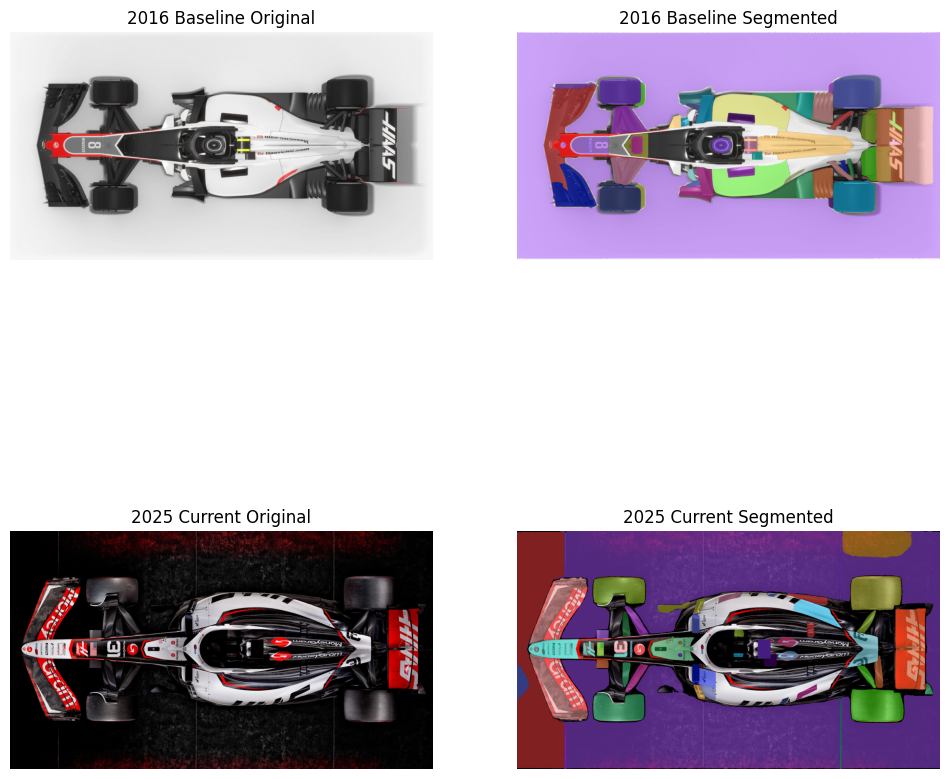

In [15]:
# Visualize BOTH images side-by-side
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

# Annotate baseline
baseline_detections = sv.Detections.from_sam(sam_result=baseline_sam_result)
baseline_annotated = mask_annotator.annotate(scene=baseline_bgr.copy(), detections=baseline_detections)

# Annotate current
current_detections = sv.Detections.from_sam(sam_result=current_sam_result)
current_annotated = mask_annotator.annotate(scene=current_bgr.copy(), detections=current_detections)

# Plot all 4 images
sv.plot_images_grid(
    images=[baseline_bgr, baseline_annotated, current_bgr, current_annotated],
    grid_size=(2, 2),
    titles=['2016 Baseline Original', '2016 Baseline Segmented',
            '2025 Current Original', '2025 Current Segmented']
)

In [16]:
mask_predictor = SamPredictor(sam)

In [17]:
IMAGE_NAME = BASELINE_IMAGE
IMAGE_PATH = BASELINE_PATH

print(f"Using: {IMAGE_NAME}")

Using: f1_2016_baseline.jpg


In [72]:
# Install LoFTR and dependencies
print("Installing LoFTR dependencies...")
!pip install -q torch einops yacs kornia
!git clone https://github.com/zju3dv/LoFTR --depth 1
!mv LoFTR/* . && rm -rf LoFTR

print("✓ LoFTR code downloaded")

Installing LoFTR dependencies...
fatal: destination path 'LoFTR' already exists and is not an empty directory.
mv: cannot move 'LoFTR/data' to './data': Directory not empty
✓ LoFTR code downloaded


In [20]:
# Download pretrained LoFTR weights
import os

!mkdir -p {HOME}/weights
%cd {HOME}/weights/

# Download outdoor model (best for studio/track images)
!gdown --id 1M-VD35-qdB5Iw-AtbDBCKC7hPolFW9UY  # outdoor-ds model

%cd {HOME}

LOFTR_WEIGHT_PATH = os.path.join(HOME, "weights", "outdoor_ds.ckpt")
print(f"✓ LoFTR weights downloaded: {LOFTR_WEIGHT_PATH}")
print(f"  Exists: {os.path.isfile(LOFTR_WEIGHT_PATH)}")

/home/jovyan/weights
/bin/bash: line 1: gdown: command not found
/home/jovyan
✓ LoFTR weights downloaded: /home/jovyan/weights/outdoor_ds.ckpt
  Exists: True


In [21]:
# Load LoFTR matcher
import torch
import sys
sys.path.insert(0, HOME)  # Add LoFTR code to path

from src.loftr import LoFTR, default_cfg

# Initialize LoFTR with outdoor config (best for F1 cars)
matcher = LoFTR(config=default_cfg)
matcher.load_state_dict(torch.load(LOFTR_WEIGHT_PATH)['state_dict'])
matcher = matcher.eval().cuda()

print("✓ LoFTR model loaded and ready on GPU")
print("  Model type: Outdoor (optimized for studio/track images)")

✓ LoFTR model loaded and ready on GPU
  Model type: Outdoor (optimized for studio/track images)


In [24]:
# Prepare images for LoFTR matching (FIXED: proper aspect ratio + padding)
import cv2
import torch
import numpy as np

# Load ORIGINAL images from data folder (not OUTPUT_DIR!)
baseline_bgr_orig = cv2.imread(BASELINE_PATH)
current_bgr_orig = cv2.imread(CURRENT_PATH)

# Save to OUTPUT_DIR for later use
OUTPUT_DIR = os.path.join(HOME, "outputs")
os.makedirs(OUTPUT_DIR, exist_ok=True)
cv2.imwrite(os.path.join(OUTPUT_DIR, "baseline_original.jpg"), baseline_bgr_orig)
cv2.imwrite(os.path.join(OUTPUT_DIR, "current_original.jpg"), current_bgr_orig)

print("✓ Original images loaded:")
print(f"  Baseline: {baseline_bgr_orig.shape} (HxWxC)")
print(f"  Current:  {current_bgr_orig.shape} (HxWxC)")

# Convert to grayscale
baseline_gray = cv2.cvtColor(baseline_bgr_orig, cv2.COLOR_BGR2GRAY)
current_gray = cv2.cvtColor(current_bgr_orig, cv2.COLOR_BGR2GRAY)

# Get original dimensions
h_base, w_base = baseline_gray.shape
h_curr, w_curr = current_gray.shape

print(f"\nOriginal dimensions:")
print(f"  Baseline: {w_base}x{h_base}")
print(f"  Current:  {w_curr}x{h_curr}")

# FIXED: Resize to SAME target width (preserve aspect ratio for height)
target_width = 640

# Calculate new heights based on aspect ratios
aspect_base = h_base / w_base
aspect_curr = h_curr / w_curr

new_w_base = target_width
new_h_base = int(target_width * aspect_base)

new_w_curr = target_width
new_h_curr = int(target_width * aspect_curr)

# Resize both images
baseline_gray_resized = cv2.resize(baseline_gray, (new_w_base, new_h_base))
current_gray_resized = cv2.resize(current_gray, (new_w_curr, new_h_curr))

print(f"\n✓ Images resized (aspect ratio preserved):")
print(f"  Baseline: {new_w_base}x{new_h_base}")
print(f"  Current:  {new_w_curr}x{new_h_curr}")

# FIXED: Find the MAXIMUM height between both images
max_h = max(new_h_base, new_h_curr)
max_w = new_w_base  # Width is already same (640)

# Round up to nearest multiple of 8 (for neural network compatibility)
max_h = ((max_h + 7) // 8) * 8
max_w = ((max_w + 7) // 8) * 8

print(f"\nTarget padded size: {max_w}x{max_h}")

# FIXED: Pad baseline (now guaranteed to be non-negative)
pad_h_base = max_h - new_h_base
pad_w_base = max_w - new_w_base

print(f"  Baseline padding: width={pad_w_base}, height={pad_h_base}")

baseline_gray_padded = np.pad(
    baseline_gray_resized,
    ((0, pad_h_base), (0, pad_w_base)),  # (top, bottom), (left, right)
    mode='constant',
    constant_values=0
)

# FIXED: Pad current (now guaranteed to be non-negative)
pad_h_curr = max_h - new_h_curr
pad_w_curr = max_w - new_w_curr

print(f"  Current padding: width={pad_w_curr}, height={pad_h_curr}")

current_gray_padded = np.pad(
    current_gray_resized,
    ((0, pad_h_curr), (0, pad_w_curr)),  # (top, bottom), (left, right)
    mode='constant',
    constant_values=0
)

print(f"\n✓ Images padded to same size: {baseline_gray_padded.shape}")

# Convert to torch tensors
baseline_tensor = torch.from_numpy(baseline_gray_padded)[None][None].cuda() / 255.
current_tensor = torch.from_numpy(current_gray_padded)[None][None].cuda() / 255.

batch = {
    'image0': baseline_tensor,  # 2016 baseline
    'image1': current_tensor    # 2025 current
}

# Store dimensions for later rescaling
scale_info = {
    'baseline_orig_shape': (h_base, w_base),
    'current_orig_shape': (h_curr, w_curr),
    'baseline_resize_shape': (new_h_base, new_w_base),
    'current_resize_shape': (new_h_curr, new_w_curr),
    'padded_shape': (max_h, max_w)
}

print("\n✓ Tensors created and moved to GPU")
print(f"  Tensor shapes: {baseline_tensor.shape}")

✓ Original images loaded:
  Baseline: (1200, 2220, 3) (HxWxC)
  Current:  (1125, 2000, 3) (HxWxC)

Original dimensions:
  Baseline: 2220x1200
  Current:  2000x1125

✓ Images resized (aspect ratio preserved):
  Baseline: 640x345
  Current:  640x360

Target padded size: 640x360
  Baseline padding: width=0, height=15
  Current padding: width=0, height=0

✓ Images padded to same size: (360, 640)

✓ Tensors created and moved to GPU
  Tensor shapes: torch.Size([1, 1, 360, 640])


In [25]:
# Run LoFTR feature matching
print("Running LoFTR feature matching...")

with torch.no_grad():
    matcher(batch)
    mkpts0 = batch['mkpts0_f'].cpu().numpy()  # Matched keypoints in baseline
    mkpts1 = batch['mkpts1_f'].cpu().numpy()  # Matched keypoints in current
    mconf = batch['mconf'].cpu().numpy()      # Match confidence scores

num_matches = len(mkpts0)
print(f"\n✓ LoFTR matching complete!")
print(f"  Total matches found: {num_matches}")
print(f"  Average confidence: {mconf.mean():.3f}")
print(f"  Min confidence: {mconf.min():.3f}")
print(f"  Max confidence: {mconf.max():.3f}")

# Quality check
if num_matches < 100:
    print("\n⚠️ WARNING: Few matches found - images may be very different")
elif num_matches < 500:
    print("\n✓ Moderate match count - alignment should work")
else:
    print("\n✅ Excellent match count - high-quality alignment expected!")

Running LoFTR feature matching...

✓ LoFTR matching complete!
  Total matches found: 166
  Average confidence: 0.357
  Min confidence: 0.201
  Max confidence: 0.771

✓ Moderate match count - alignment should work


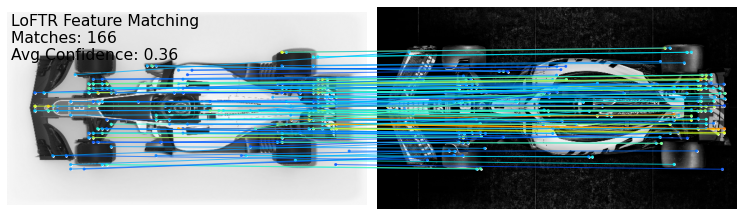

📊 Visualization shows:
  - Green lines = High confidence matches
  - Red lines = Lower confidence matches
  - Lines connect corresponding points between images


In [26]:
# Visualize matches using LoFTR's plotting function
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Import LoFTR's visualization utility
from src.utils.plotting import make_matching_figure

# Color code matches by confidence
color = cm.jet(mconf, alpha=0.7)

# Create visualization
text = [
    'LoFTR Feature Matching',
    f'Matches: {num_matches}',
    f'Avg Confidence: {mconf.mean():.2f}'
]

fig = make_matching_figure(
    baseline_gray_resized,
    current_gray_resized,
    mkpts0,
    mkpts1,
    color,
    mkpts0,  # Show all matches
    mkpts1,
    text
)

plt.show()

print("📊 Visualization shows:")
print("  - Green lines = High confidence matches")
print("  - Red lines = Lower confidence matches")
print("  - Lines connect corresponding points between images")

In [27]:
# Compute AFFINE transformation using LoFTR matches (BEST: no perspective distortion!)
import cv2
import numpy as np

# Get original dimensions
h_base, w_base = scale_info['baseline_orig_shape']
h_curr, w_curr = scale_info['current_orig_shape']

# Get resized dimensions
new_h_base, new_w_base = scale_info['baseline_resize_shape']
new_h_curr, new_w_curr = scale_info['current_resize_shape']

# Scale keypoints to original size
scale_x_base = w_base / new_w_base
scale_y_base = h_base / new_h_base
scale_x_curr = w_curr / new_w_curr
scale_y_curr = h_curr / new_h_curr

mkpts0_scaled = mkpts0 * np.array([scale_x_base, scale_y_base])
mkpts1_scaled = mkpts1 * np.array([scale_x_curr, scale_y_curr])

print(f"Scaling keypoints back to original size:")
print(f"  Baseline: {w_base}x{h_base}")
print(f"  Current: {w_curr}x{h_curr}")

# Filter by confidence threshold
confidence_threshold = 0.6
high_conf_mask = mconf > confidence_threshold
mkpts0_filtered = mkpts0_scaled[high_conf_mask]
mkpts1_filtered = mkpts1_scaled[high_conf_mask]

print(f"\n✓ Filtered by confidence (>{confidence_threshold}):")
print(f"  Kept: {len(mkpts0_filtered)}/{len(mkpts0_scaled)} matches")

# Lower threshold if too few matches
if len(mkpts0_filtered) < 20:
    confidence_threshold = 0.4
    high_conf_mask = mconf > confidence_threshold
    mkpts0_filtered = mkpts0_scaled[high_conf_mask]
    mkpts1_filtered = mkpts1_scaled[high_conf_mask]
    print(f"  ⚠️ Lowered to {confidence_threshold}: {len(mkpts0_filtered)} matches")

# ==================================================================
# METHOD 1: Try AFFINE transform first (translation + rotation + uniform scale)
# ==================================================================
print("\n🔧 Method 1: Computing AFFINE transformation...")
print("   (Allows: translation + rotation + uniform scale)")

M_affine, ransac_mask = cv2.estimateAffinePartial2D(
    mkpts1_filtered,  # Source (current image)
    mkpts0_filtered,  # Destination (baseline image)
    method=cv2.RANSAC,
    ransacReprojThreshold=8.0,  # Pixel tolerance (higher = more permissive)
    maxIters=3000,
    confidence=0.995,
    refineIters=10
)

if M_affine is not None:
    inliers = ransac_mask.sum()
    inlier_ratio = inliers / len(ransac_mask)

    print(f"✓ Affine transform computed!")
    print(f"  Inliers: {inliers}/{len(ransac_mask)} ({inlier_ratio*100:.1f}%)")

    # Extract transformation parameters
    scale_x = np.sqrt(M_affine[0, 0]**2 + M_affine[0, 1]**2)
    scale_y = np.sqrt(M_affine[1, 0]**2 + M_affine[1, 1]**2)
    rotation_deg = np.arctan2(M_affine[1, 0], M_affine[0, 0]) * 180 / np.pi
    tx = M_affine[0, 2]
    ty = M_affine[1, 2]

    print(f"\n📊 Transformation breakdown:")
    print(f"  Translation: ({tx:.1f}px, {ty:.1f}px)")
    print(f"  Rotation: {rotation_deg:.2f}°")
    print(f"  Scale: ({scale_x:.3f}x, {scale_y:.3f}x)")

    # Quality checks
    use_affine = True

    # Check 1: Inlier ratio
    if inlier_ratio < 0.3:
        print(f"  ⚠️ WARNING: Low inlier ratio ({inlier_ratio*100:.1f}%)")
        use_affine = False

    # Check 2: Rotation too large
    if abs(rotation_deg) > 20:
        print(f"  ⚠️ WARNING: Large rotation ({rotation_deg:.1f}°)")
        print("     Images may have very different perspectives")
        use_affine = False

    # Check 3: Extreme scaling
    if scale_x < 0.7 or scale_x > 1.9 or scale_y < 0.7 or scale_y > 1.9:
        print(f"  ⚠️ WARNING: Extreme scaling (x={scale_x:.2f}, y={scale_y:.2f})")
        use_affine = False

    if use_affine:
        # Convert to 3x3 homography format for warpPerspective
        H = np.vstack([M_affine, [0, 0, 1]])
        print(f"\n✅ AFFINE transform accepted!")
        print(f"   Will apply: {tx:.0f}px shift, {rotation_deg:.1f}° rotation, {scale_x:.2f}x scale")
    else:
        print(f"\n❌ Affine rejected - falling back to translation-only...")
        M_affine = None

else:
    print("❌ Affine computation failed!")
    M_affine = None

# ==================================================================
# METHOD 2: Fallback to TRANSLATION-ONLY if affine fails/rejected
# ==================================================================
if M_affine is None:
    print("\n🔧 Method 2: Computing TRANSLATION-ONLY transformation...")
    print("   (Allows: only horizontal/vertical shift)")

    # Calculate translation vectors for all high-confidence matches
    translations = mkpts0_filtered - mkpts1_filtered

    # Use MEDIAN (robust to outliers)
    tx_median = np.median(translations[:, 0])
    ty_median = np.median(translations[:, 1])

    print(f"\n✓ Median translation computed:")
    print(f"  Shift: ({tx_median:.1f}px, {ty_median:.1f}px)")

    # Create affine matrix for pure translation
    M_affine = np.array([
        [1.0, 0.0, tx_median],  # No rotation, no scale
        [0.0, 1.0, ty_median]
    ], dtype=np.float32)

    H = np.vstack([M_affine, [0, 0, 1]])

    print(f"\n✅ TRANSLATION-ONLY transform applied")
    print(f"   (Simple {tx_median:.0f}px, {ty_median:.0f}px shift)")

# ==================================================================
# Final transformation matrix ready
# ==================================================================
print("\n" + "="*60)
print("FINAL TRANSFORMATION MATRIX:")
print(M_affine)
print("="*60)

Scaling keypoints back to original size:
  Baseline: 2220x1200
  Current: 2000x1125

✓ Filtered by confidence (>0.6):
  Kept: 15/166 matches
  ⚠️ Lowered to 0.4: 43 matches

🔧 Method 1: Computing AFFINE transformation...
   (Allows: translation + rotation + uniform scale)
✓ Affine transform computed!
  Inliers: 14/43 (32.6%)

📊 Transformation breakdown:
  Translation: (152.2px, 51.5px)
  Rotation: -0.00°
  Scale: (0.979x, 0.979x)

✅ AFFINE transform accepted!
   Will apply: 152px shift, -0.0° rotation, 0.98x scale

FINAL TRANSFORMATION MATRIX:
[[ 9.79286352e-01  4.75207565e-05  1.52212823e+02]
 [-4.75207565e-05  9.79286352e-01  5.14774793e+01]]


In [28]:
# Warp the current image to align with baseline
if H is not None:
    height, width = baseline_bgr_orig.shape[:2]

    print(f"Warping 2025 current image to match 2016 baseline...")
    print(f"  Target size: {width}x{height}")

    # Warp the full-resolution original image
    aligned_current = cv2.warpPerspective(
        current_bgr_orig,
        H,
        (width, height),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=(0, 0, 0)
    )

    print("✓ Warping complete!")
    print(f"  Aligned image shape: {aligned_current.shape}")

    # Save aligned image
    cv2.imwrite(os.path.join(OUTPUT_DIR, "current_aligned.jpg"), aligned_current)
    print(f"  Saved to: {OUTPUT_DIR}/current_aligned.jpg")

else:
    print("⚠️ Skipping warp - no valid homography")
    aligned_current = current_bgr_orig.copy()

Warping 2025 current image to match 2016 baseline...
  Target size: 2220x1200
✓ Warping complete!
  Aligned image shape: (1200, 2220, 3)
  Saved to: /home/jovyan/outputs/current_aligned.jpg


In [79]:
# ============================================================================
# STEP 3: VISUALIZE AND SAVE ALIGNMENT RESULTS (API COMPATIBLE)
# ============================================================================

import supervision as sv
import cv2
import numpy as np

print("📊 Visualizing and saving alignment results...")

if H is not None:
    # ========================================================================
    # SAVE ORIGINAL BASELINE (for frontend "Before" panel)
    # ========================================================================
    baseline_original_path = os.path.join(OUTPUT_DIR, "baseline_original.jpg")
    cv2.imwrite(baseline_original_path, baseline_bgr_orig)
    print(f"✓ Saved baseline original: {baseline_original_path}")
    
    # ========================================================================
    # SAVE UNALIGNED CURRENT (for frontend "After" panel - before alignment)
    # ========================================================================
    current_unaligned_path = os.path.join(OUTPUT_DIR, "current_unaligned.jpg")
    cv2.imwrite(current_unaligned_path, current_bgr_orig)
    print(f"✓ Saved current unaligned: {current_unaligned_path}")
    
    # ========================================================================
    # CREATE AND SAVE ALIGNMENT OVERLAY (Red/Green overlay)
    # ========================================================================
    overlay = np.zeros_like(baseline_bgr_orig)
    overlay[:, :, 2] = cv2.cvtColor(baseline_bgr_orig, cv2.COLOR_BGR2GRAY)    # Red = baseline
    overlay[:, :, 1] = cv2.cvtColor(aligned_current, cv2.COLOR_BGR2GRAY)     # Green = current aligned
    
    alignment_overlay_path = os.path.join(OUTPUT_DIR, "alignment_overlay.jpg")
    cv2.imwrite(alignment_overlay_path, overlay)
    print(f"✓ Saved alignment overlay: {alignment_overlay_path}")
    
    # ========================================================================
    # DISPLAY VISUALIZATIONS
    # ========================================================================
    # Show before/after alignment
    sv.plot_images_grid(
        images=[baseline_bgr_orig, current_bgr_orig],
        grid_size=(1, 2),
        titles=['2016 Baseline (Reference)', '2025 Current (Original - Unaligned)'],
        size=(16, 8)
    )

    sv.plot_images_grid(
        images=[baseline_bgr_orig, aligned_current],
        grid_size=(1, 2),
        titles=['2016 Baseline (Reference)', '2025 Current (Aligned with LoFTR ✓)'],
        size=(16, 8)
    )
    
    # Create 50/50 blend for comparison
    alpha = 0.5
    blended = cv2.addWeighted(baseline_bgr_orig, alpha, aligned_current, 1-alpha, 0)
    
    # Show overlay and blend
    sv.plot_images_grid(
        images=[overlay, blended],
        grid_size=(1, 2),
        titles=['Alignment Check (Red=2016, Green=2025)', 'Blended 50/50 Overlay'],
        size=(16, 8)
    )

    print("\n📊 Compare the visualizations:")
    print("  - First row: Original unaligned images")
    print("  - Second row: Baseline + LoFTR-aligned current")
    print("  - Third row: Red/Green overlay + 50/50 blend")
    print("  - Cars should overlap perfectly in aligned views")
    
    print(f"\n✅ Pipeline Step 3 Complete: LoFTR Image Alignment")
    print(f"   Ready for Step 4: Change Detection")
    print(f"\n📁 Saved files for API:")
    print(f"   1. {baseline_original_path}")
    print(f"   2. {current_unaligned_path}")
    print(f"   3. {alignment_overlay_path}")
else:
    print("⚠️ Cannot create visualization - alignment failed")

📊 Visualizing and saving alignment results...
✓ Saved baseline original: /home/jovyan/outputs/baseline_original.jpg
✓ Saved current unaligned: /home/jovyan/outputs/current_unaligned.jpg
✓ Saved alignment overlay: /home/jovyan/outputs/alignment_overlay.jpg

📊 Compare the visualizations:
  - First row: Original unaligned images
  - Second row: Baseline + LoFTR-aligned current
  - Third row: Red/Green overlay + 50/50 blend
  - Cars should overlap perfectly in aligned views

✅ Pipeline Step 3 Complete: LoFTR Image Alignment
   Ready for Step 4: Change Detection

📁 Saved files for API:
   1. /home/jovyan/outputs/baseline_original.jpg
   2. /home/jovyan/outputs/current_unaligned.jpg
   3. /home/jovyan/outputs/alignment_overlay.jpg


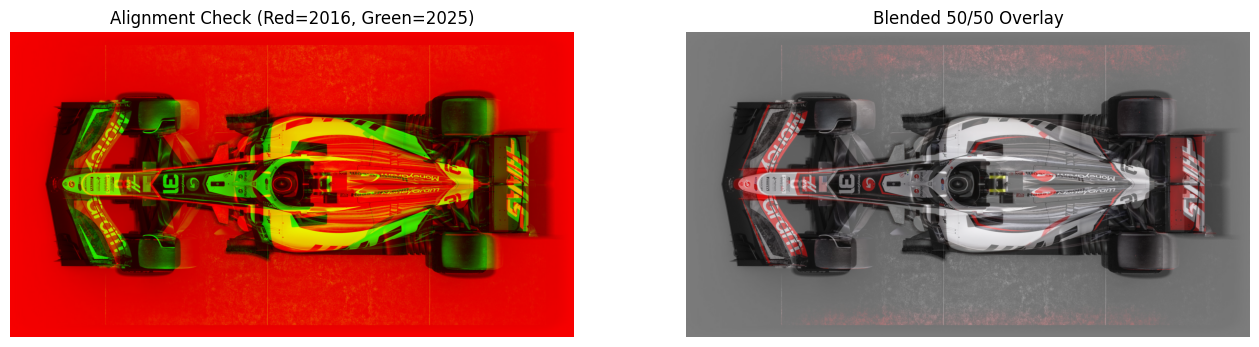

📊 Alignment Quality Indicators:
  - Left image: Red/Green overlay
    • Gray = Perfect alignment
    • Cyan/Magenta = Misalignment
  - Right image: 50/50 blend
    • Ghosting = Poor alignment
    • Clear overlap = Good alignment

✅ Pipeline Step 3 Complete: LoFTR Image Alignment
   Ready for Step 4: Change Detection


In [30]:
# Create overlay to verify alignment quality
if H is not None:
    # Create red/green overlay (like stereo 3D)
    overlay = np.zeros_like(baseline_bgr_orig)
    overlay[:, :, 2] = cv2.cvtColor(baseline_bgr_orig, cv2.COLOR_BGR2GRAY)    # Red = baseline
    overlay[:, :, 1] = cv2.cvtColor(aligned_current, cv2.COLOR_BGR2GRAY)     # Green = current

    # Create 50/50 blend
    alpha = 0.5
    blended = cv2.addWeighted(baseline_bgr_orig, alpha, aligned_current, 1-alpha, 0)

    # Visualize
    sv.plot_images_grid(
        images=[overlay, blended],
        grid_size=(1, 2),
        titles=['Alignment Check (Red=2016, Green=2025)', 'Blended 50/50 Overlay'],
        size=(16, 8)
    )

    print("📊 Alignment Quality Indicators:")
    print("  - Left image: Red/Green overlay")
    print("    • Gray = Perfect alignment")
    print("    • Cyan/Magenta = Misalignment")
    print("  - Right image: 50/50 blend")
    print("    • Ghosting = Poor alignment")
    print("    • Clear overlap = Good alignment")

    print(f"\n✅ Pipeline Step 3 Complete: LoFTR Image Alignment")
    print(f"   Ready for Step 4: Change Detection")
else:
    print("⚠️ Cannot create overlay - alignment failed")

In [31]:
# ============================================================================
# STEP 4: PHOTOMETRIC NORMALIZATION
# ============================================================================
# Goal: Match lighting/colors between baseline and aligned current images
# Techniques: CLAHE (contrast enhancement) + Histogram Matching

import cv2
import numpy as np
from skimage import exposure

print("="*70)
print("🎨 STEP 4: PHOTOMETRIC NORMALIZATION")
print("="*70)

# Ensure we have aligned images from previous step
if 'aligned_current' not in locals() or 'baseline_bgr_orig' not in locals():
    print("❌ ERROR: Please run alignment step (Cell 38) first!")
else:
    # -----------------------------------------------------------------------
    # Step 4.1: Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    # -----------------------------------------------------------------------
    print("\n📊 Step 4.1: Applying CLAHE for contrast enhancement...")

    # Create CLAHE object (clipLimit controls contrast enhancement)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    # Apply CLAHE to each BGR channel separately
    def apply_clahe_bgr(image):
        """Apply CLAHE to each channel of a BGR image"""
        b, g, r = cv2.split(image)
        b_clahe = clahe.apply(b)
        g_clahe = clahe.apply(g)
        r_clahe = clahe.apply(r)
        return cv2.merge([b_clahe, g_clahe, r_clahe])

    # Apply to baseline
    baseline_clahe = apply_clahe_bgr(baseline_bgr_orig)
    print("  ✓ CLAHE applied to baseline image")

    # Apply to aligned current
    current_clahe = apply_clahe_bgr(aligned_current)
    print("  ✓ CLAHE applied to current image")

    # -----------------------------------------------------------------------
    # Step 4.2: Histogram Matching (match current to baseline reference)
    # -----------------------------------------------------------------------
    print("\n📊 Step 4.2: Applying histogram matching...")

    # Convert to RGB for scikit-image (it expects RGB)
    baseline_rgb = cv2.cvtColor(baseline_clahe, cv2.COLOR_BGR2RGB)
    current_rgb = cv2.cvtColor(current_clahe, cv2.COLOR_BGR2RGB)

    # Match histogram of current to baseline (channel-by-channel)
    current_matched = exposure.match_histograms(
        current_rgb,
        baseline_rgb,
        channel_axis=2  # Process each RGB channel
    )

    # Convert back to BGR
    current_normalized = cv2.cvtColor(current_matched.astype(np.uint8), cv2.COLOR_RGB2BGR)
    baseline_normalized = baseline_clahe  # Baseline already has CLAHE

    print("  ✓ Histogram matching complete")

    # -----------------------------------------------------------------------
    # Step 4.3: Quality Metrics
    # -----------------------------------------------------------------------
    print("\n📊 Step 4.3: Computing quality metrics...")

    def compute_brightness_stats(image, name):
        """Compute mean brightness for each channel"""
        b, g, r = cv2.split(image)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print(f"  {name}:")
        print(f"    Mean brightness: {gray.mean():.1f}")
        print(f"    Std deviation: {gray.std():.1f}")
        print(f"    RGB means: B={b.mean():.1f}, G={g.mean():.1f}, R={r.mean():.1f}")

    print("\n  Before normalization:")
    compute_brightness_stats(baseline_bgr_orig, "Baseline")
    compute_brightness_stats(aligned_current, "Current")

    print("\n  After normalization:")
    compute_brightness_stats(baseline_normalized, "Baseline (normalized)")
    compute_brightness_stats(current_normalized, "Current (normalized)")

    # -----------------------------------------------------------------------
    # Step 4.4: Save normalized images
    # -----------------------------------------------------------------------
    print("\n💾 Step 4.4: Saving normalized images...")

    cv2.imwrite(os.path.join(OUTPUT_DIR, "baseline_normalized.jpg"), baseline_normalized)
    cv2.imwrite(os.path.join(OUTPUT_DIR, "current_normalized.jpg"), current_normalized)

    print(f"  ✓ Saved: {OUTPUT_DIR}/baseline_normalized.jpg")
    print(f"  ✓ Saved: {OUTPUT_DIR}/current_normalized.jpg")

    print("\n" + "="*70)
    print("✅ PHOTOMETRIC NORMALIZATION COMPLETE!")
    print("="*70)
    print("\nNormalized images ready for change detection (Step 5)")

🎨 STEP 4: PHOTOMETRIC NORMALIZATION

📊 Step 4.1: Applying CLAHE for contrast enhancement...
  ✓ CLAHE applied to baseline image
  ✓ CLAHE applied to current image

📊 Step 4.2: Applying histogram matching...
  ✓ Histogram matching complete

📊 Step 4.3: Computing quality metrics...

  Before normalization:
  Baseline:
    Mean brightness: 181.9
    Std deviation: 76.0
    RGB means: B=181.2, G=181.4, R=183.0
  Current:
    Mean brightness: 28.4
    Std deviation: 54.3
    RGB means: B=26.6, G=25.5, R=34.9

  After normalization:
  Baseline (normalized):
    Mean brightness: 176.3
    Std deviation: 68.3
    RGB means: B=176.1, G=176.1, R=176.7
  Current (normalized):
    Mean brightness: 200.0
    Std deviation: 42.3
    RGB means: B=201.2, G=201.5, R=196.9

💾 Step 4.4: Saving normalized images...
  ✓ Saved: /home/jovyan/outputs/baseline_normalized.jpg
  ✓ Saved: /home/jovyan/outputs/current_normalized.jpg

✅ PHOTOMETRIC NORMALIZATION COMPLETE!

Normalized images ready for change detecti

📊 Visualizing normalization results...


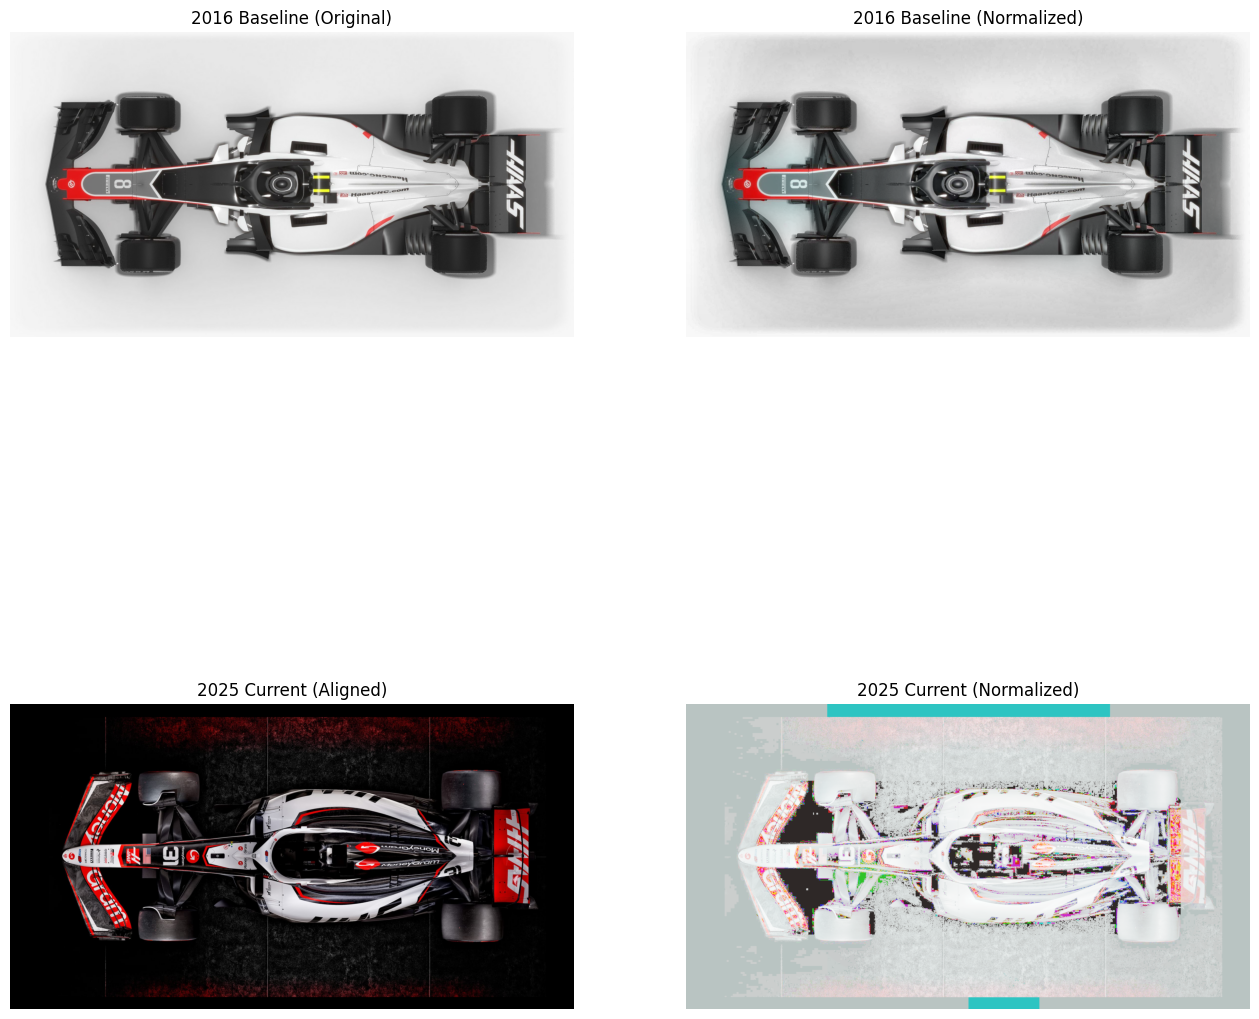


📊 Histogram comparison:


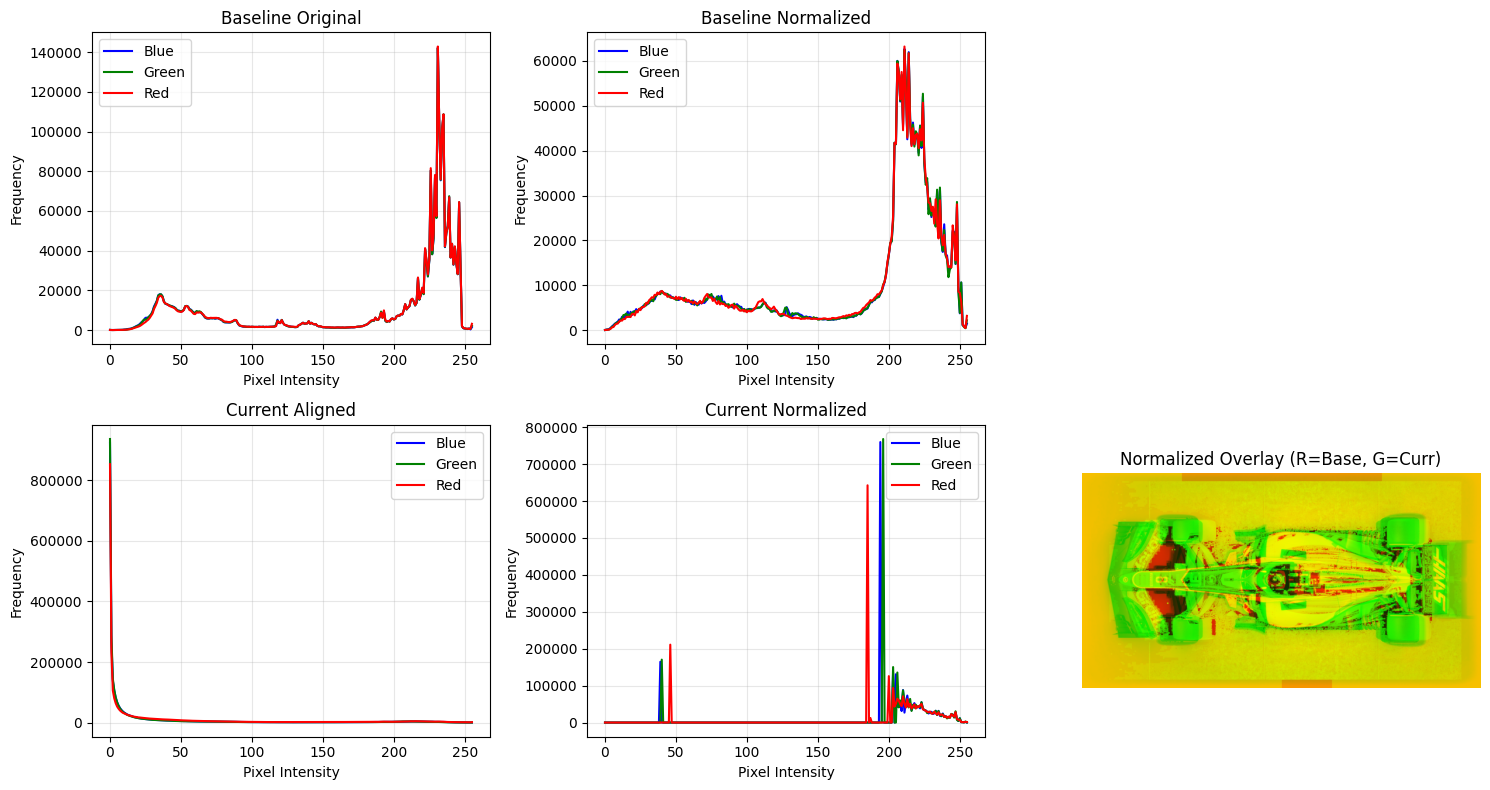


✅ Visualization complete!

📊 What to look for:
  ✓ Histograms should be more similar after normalization
  ✓ Overlay should show more gray (aligned) regions
  ✓ Colors should appear more consistent between images


In [32]:
# ============================================================================
# STEP 4: VISUALIZATION - Before/After Normalization Comparison
# ============================================================================

import supervision as sv
import matplotlib.pyplot as plt

print("📊 Visualizing normalization results...")

if 'baseline_normalized' in locals() and 'current_normalized' in locals():

    # -----------------------------------------------------------------------
    # Visualization 1: Side-by-side comparison (4 images)
    # -----------------------------------------------------------------------
    sv.plot_images_grid(
        images=[
            baseline_bgr_orig,      # Original baseline
            baseline_normalized,    # Normalized baseline
            aligned_current,        # Aligned current (before normalization)
            current_normalized      # Normalized current
        ],
        grid_size=(2, 2),
        titles=[
            '2016 Baseline (Original)',
            '2016 Baseline (Normalized)',
            '2025 Current (Aligned)',
            '2025 Current (Normalized)'
        ],
        size=(16, 16)
    )

    # -----------------------------------------------------------------------
    # Visualization 2: Histograms comparison
    # -----------------------------------------------------------------------
    print("\n📊 Histogram comparison:")

    fig, axes = plt.subplots(2, 3, figsize=(15, 8))

    def plot_histogram(ax, image, title, color_labels):
        """Plot RGB histograms for an image"""
        colors = ('b', 'g', 'r')
        for i, (col, label) in enumerate(zip(colors, color_labels)):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            ax.plot(hist, color=col, label=label)
        ax.set_title(title)
        ax.set_xlabel('Pixel Intensity')
        ax.set_ylabel('Frequency')
        ax.legend()
        ax.grid(alpha=0.3)

    # Row 1: Baseline histograms
    plot_histogram(axes[0, 0], baseline_bgr_orig, 'Baseline Original', ['Blue', 'Green', 'Red'])
    plot_histogram(axes[0, 1], baseline_normalized, 'Baseline Normalized', ['Blue', 'Green', 'Red'])
    axes[0, 2].axis('off')  # Empty cell

    # Row 2: Current histograms
    plot_histogram(axes[1, 0], aligned_current, 'Current Aligned', ['Blue', 'Green', 'Red'])
    plot_histogram(axes[1, 1], current_normalized, 'Current Normalized', ['Blue', 'Green', 'Red'])

    # Overlay comparison (normalized images)
    overlay_norm = np.zeros_like(baseline_normalized)
    overlay_norm[:, :, 2] = cv2.cvtColor(baseline_normalized, cv2.COLOR_BGR2GRAY)  # Red
    overlay_norm[:, :, 1] = cv2.cvtColor(current_normalized, cv2.COLOR_BGR2GRAY)   # Green
    axes[1, 2].imshow(cv2.cvtColor(overlay_norm, cv2.COLOR_BGR2RGB))
    axes[1, 2].set_title('Normalized Overlay (R=Base, G=Curr)')
    axes[1, 2].axis('off')

    plt.tight_layout()
    plt.show()

    print("\n✅ Visualization complete!")
    print("\n📊 What to look for:")
    print("  ✓ Histograms should be more similar after normalization")
    print("  ✓ Overlay should show more gray (aligned) regions")
    print("  ✓ Colors should appear more consistent between images")

else:
    print("❌ ERROR: Run normalization step (Cell 44) first!")

In [33]:
# ============================================================================
# PIPELINE STATUS: Steps 1-4 Complete
# ============================================================================

import os

print("="*70)
print("🏁 F1 VISUAL CHANGE DETECTION PIPELINE - STATUS")
print("="*70)

# Check what's been completed
steps_status = {
    "Step 1: Image Input": os.path.isfile(BASELINE_PATH) and os.path.isfile(CURRENT_PATH),
    "Step 2: SAM Segmentation": 'baseline_sam_result' in locals(),
    "Step 3: LoFTR Alignment": 'aligned_current' in locals(),
    "Step 4: Photometric Normalization": 'baseline_normalized' in locals() and 'current_normalized' in locals()
}

for step, status in steps_status.items():
    symbol = "✅" if status else "❌"
    print(f"{symbol} {step}")

print("\n" + "="*70)

if all(steps_status.values()):
    print("🎉 ALL PREPROCESSING STEPS COMPLETE!")
    print("\n📁 Output Files:")
    output_files = [
        "baseline_original.jpg",
        "current_original.jpg",
        "current_aligned.jpg",
        "baseline_normalized.jpg",
        "current_normalized.jpg"
    ]

    for filename in output_files:
        filepath = os.path.join(OUTPUT_DIR, filename)
        if os.path.isfile(filepath):
            size_kb = os.path.getsize(filepath) / 1024
            print(f"  ✓ {filename} ({size_kb:.1f} KB)")

    print("\n🚀 READY FOR NEXT STEPS:")
    print("  → Step 5: Change Detection (Siamese CNN/Transformer)")
    print("  → Step 6: Few-Shot Part Classification")
    print("  → Step 7: Uncertainty Estimation")
    print("  → Step 8: XAI Overlays (GradCAM)")
    print("  → Step 9: Report Generation")

    print("\n📊 Variables ready for next step:")
    print(f"  • baseline_normalized: {baseline_normalized.shape}")
    print(f"  • current_normalized: {current_normalized.shape}")
    print(f"  • OUTPUT_DIR: {OUTPUT_DIR}")

else:
    print("\n⚠️ INCOMPLETE PIPELINE!")
    print("Please complete all steps before proceeding.")

print("="*70)

🏁 F1 VISUAL CHANGE DETECTION PIPELINE - STATUS
✅ Step 1: Image Input
✅ Step 2: SAM Segmentation
✅ Step 3: LoFTR Alignment
✅ Step 4: Photometric Normalization

🎉 ALL PREPROCESSING STEPS COMPLETE!

📁 Output Files:
  ✓ baseline_original.jpg (330.4 KB)
  ✓ current_original.jpg (638.4 KB)
  ✓ current_aligned.jpg (687.6 KB)
  ✓ baseline_normalized.jpg (424.9 KB)
  ✓ current_normalized.jpg (897.0 KB)

🚀 READY FOR NEXT STEPS:
  → Step 5: Change Detection (Siamese CNN/Transformer)
  → Step 6: Few-Shot Part Classification
  → Step 7: Uncertainty Estimation
  → Step 8: XAI Overlays (GradCAM)
  → Step 9: Report Generation

📊 Variables ready for next step:
  • baseline_normalized: (1200, 2220, 3)
  • current_normalized: (1200, 2220, 3)
  • OUTPUT_DIR: /home/jovyan/outputs


In [82]:
# ============================================================================
# STEP 5: CHANGE DETECTION - Install Dependencies
# ============================================================================

import os
import sys

print("="*70)
print("🔍 STEP 5: CHANGE DETECTION (SEGMENT ANY CHANGE)")
print("="*70)

print("\n📦 Installing pytorch-change-models (torchange)...")

# Clone the pytorch-change-models repository
!git clone https://github.com/Z-Zheng/pytorch-change-models.git {HOME}/pytorch-change-models

# Add to Python path
TORCHANGE_PATH = os.path.join(HOME, "pytorch-change-models")
if TORCHANGE_PATH not in sys.path:
    sys.path.insert(0, TORCHANGE_PATH)

print(f"✓ Repository cloned to: {TORCHANGE_PATH}")

# Install required dependencies
print("\n📦 Installing dependencies...")
!pip install -q scikit-image torch torchvision

print("✓ All dependencies installed")
print(f"✓ torchange path added to sys.path")

🔍 STEP 5: CHANGE DETECTION (SEGMENT ANY CHANGE)

📦 Installing pytorch-change-models (torchange)...
fatal: destination path '/home/jovyan/pytorch-change-models' already exists and is not an empty directory.
✓ Repository cloned to: /home/jovyan/pytorch-change-models

📦 Installing dependencies...
✓ All dependencies installed
✓ torchange path added to sys.path


In [35]:
# ============================================================================
# STEP 5: Verify SAM Checkpoint for AnyChange
# ============================================================================

import os

print("\n🔍 Checking SAM checkpoint...")

# AnyChange requires the same SAM checkpoint we already downloaded
SAM_CHECKPOINT = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")

if os.path.isfile(SAM_CHECKPOINT):
    print(f"✓ SAM checkpoint found: {SAM_CHECKPOINT}")
    print(f"  File size: {os.path.getsize(SAM_CHECKPOINT) / (1024**3):.2f} GB")
else:
    print("❌ SAM checkpoint not found!")
    print("⚠️ Please ensure Cell 9 (Download SAM weights) was executed successfully")
    raise FileNotFoundError(f"SAM checkpoint not found at: {SAM_CHECKPOINT}")

print("\n✅ SAM checkpoint ready for AnyChange")


🔍 Checking SAM checkpoint...
✓ SAM checkpoint found: /home/jovyan/weights/sam_vit_h_4b8939.pth
  File size: 2.39 GB

✅ SAM checkpoint ready for AnyChange


In [ ]:
!pip install ever-beta

In [ ]:
!pip install torchange

In [ ]:
!pip install --force-reinstall pydantic==2.11.10 pydantic-core==2.33.2 albumentations==2.0.8

In [70]:
# ============================================================================
# STEP 5: Initialize AnyChange Model
# ============================================================================

from torchange.models.segment_any_change import AnyChange

print("\n🤖 Initializing AnyChange model...")

# Initialize AnyChange with ViT-H (same as our SAM model)
anychange_model = AnyChange(
    model_type='vit_h',  # Must match our downloaded SAM checkpoint
    sam_checkpoint=SAM_CHECKPOINT
)

print("✓ AnyChange model initialized")
print(f"  Model type: vit_h")
print(f"  Device: {anychange_model.device}")

# ============================================================================
# Configure SAM Mask Generator
# ============================================================================
print("\n⚙️ Configuring SAM mask generator...")

anychange_model.make_mask_generator(
    points_per_side=32,              # Grid density (32x32 = 1024 points)
    stability_score_thresh=0.95,     # Only keep stable masks
    pred_iou_thresh=0.88,            # High quality threshold
    box_nms_thresh=0.7               # Remove overlapping masks
)

print("✓ Mask generator configured")
print("  Points per side: 32")
print("  Stability threshold: 0.95")
print("  IoU threshold: 0.88")

# ============================================================================
# Set AnyChange Hyperparameters
# ============================================================================
print("\n⚙️ Setting AnyChange hyperparameters...")

anychange_model.set_hyperparameters(
    change_confidence_threshold=145, # Lower = more sensitive (default: 145)
    #auto_threshold=True,  
    use_normalized_feature=True,      # Better for lighting variations
    bitemporal_match=True,            # Match masks in both directions
    match_hist=False,                 # We already did histogram matching in Step 4!
    area_thresh=0.8,                  # Filter masks > 80% of image area
)

print("✓ Hyperparameters set")
print("  Change confidence threshold: 145")
print("  Normalized features: True")
print("  Bitemporal matching: True")
print("  Histogram matching: False (already done in Step 4)")

print("\n✅ AnyChange model ready for inference")


🤖 Initializing AnyChange model...
✓ AnyChange model initialized
  Model type: vit_h
  Device: cuda

⚙️ Configuring SAM mask generator...
✓ Mask generator configured
  Points per side: 32
  Stability threshold: 0.95
  IoU threshold: 0.88

⚙️ Setting AnyChange hyperparameters...
✓ Hyperparameters set
  Change confidence threshold: 145
  Normalized features: True
  Bitemporal matching: True
  Histogram matching: False (already done in Step 4)

✅ AnyChange model ready for inference


In [37]:
# ============================================================================
# STEP 5: Run Change Detection on Normalized Images (FIXED CONFIDENCE CHECK)
# ============================================================================

import numpy as np
import cv2

print("\n🔍 Running AnyChange on normalized F1 car images...")

# Ensure we have normalized images from Step 4
if 'baseline_normalized' not in locals() or 'current_normalized' not in locals():
    print("❌ ERROR: Normalized images not found!")
    print("   Please run Step 4 (Photometric Normalization) first")
    raise ValueError("Missing normalized images")

# Convert BGR to RGB (AnyChange expects RGB)
baseline_rgb = cv2.cvtColor(baseline_normalized, cv2.COLOR_BGR2RGB)
current_rgb = cv2.cvtColor(current_normalized, cv2.COLOR_BGR2RGB)

print(f"✓ Images prepared for AnyChange:")
print(f"  Baseline: {baseline_rgb.shape} (RGB)")
print(f"  Current:  {current_rgb.shape} (RGB)")

# ============================================================================
# Run AnyChange Forward Pass
# ============================================================================
print("\n⏳ Running change detection (this may take 10-30 seconds)...")

import time
start_time = time.time()

# Forward pass: Returns (change_masks, t1_masks, t2_masks)
change_masks, baseline_masks, current_masks = anychange_model.forward(
    baseline_rgb,  # Time 1 (2016 baseline)
    current_rgb    # Time 2 (2025 current)
)

elapsed = time.time() - start_time

print(f"\n✅ Change detection complete! (took {elapsed:.1f} seconds)")

# ============================================================================
# Analyze Results (FIXED: Handle Negative Confidence Scores)
# ============================================================================
print("\n📊 Detection Results:")
print(f"  Total change masks detected: {len(change_masks['rles'])}")

if len(change_masks['rles']) > 0:
    # Get change confidence scores
    confidences = change_masks['change_confidence'].cpu().numpy()

    print(f"  Average confidence: {confidences.mean():.3f}")
    print(f"  Min confidence: {confidences.min():.3f}")
    print(f"  Max confidence: {confidences.max():.3f}")

    # ========================================================================
    # FIXED: Proper threshold for negative scores
    # ========================================================================
    # If scores are negative (cosine similarity near 1), use a lower bound
    if confidences.max() < 0:
        print("\n  ℹ️ Note: Confidence scores are negative (features are similar)")
        print("     Using relative threshold for ranking...")
        
        # Use percentile-based threshold (top 25% of detections)
        threshold_pct = np.percentile(confidences, 75)  # Top 25%
        high_conf_count = (confidences > threshold_pct).sum()
        
        print(f"  High confidence changes (top 25%): {high_conf_count}/{len(confidences)}")
        print(f"  Threshold used: {threshold_pct:.3f}")
        
    else:
        # Standard threshold for positive scores
        threshold = 0.5
        high_conf_count = (confidences > threshold).sum()
        print(f"  High confidence changes (>{threshold}): {high_conf_count}/{len(confidences)}")

    # Get change areas
    if 'areas' in change_masks._stats:
        areas = change_masks['areas']
        if isinstance(areas, torch.Tensor):
            areas = areas.cpu().numpy()
        print(f"\n  Change areas (pixels):")
        print(f"    Total pixels changed: {areas.sum():.0f}")
        print(f"    Average change size: {areas.mean():.0f} px")
        print(f"    Largest change: {areas.max():.0f} px")
        print(f"    Smallest change: {areas.min():.0f} px")

    # ========================================================================
    # Quality Assessment (FIXED)
    # ========================================================================
    print(f"\n  Quality Assessment:")
    
    if confidences.max() < 0:
        # For negative scores, check if we have enough detections
        if high_conf_count > 20:
            print(f"    ✅ Excellent - {high_conf_count} high-quality changes detected!")
        elif high_conf_count > 10:
            print(f"    ✓ Good - {high_conf_count} significant changes detected")
        else:
            print(f"    ⚠️ Moderate - Only {high_conf_count} changes above threshold")
    else:
        # Standard assessment for positive scores
        if high_conf_count > 10:
            print("    ✅ Excellent - Many significant changes detected!")
        elif high_conf_count > 5:
            print("    ✓ Good - Several changes detected")
        elif high_conf_count > 0:
            print("    ⚠️ Few changes - May include noise")
        else:
            print("    ❌ No high-confidence changes detected")

else:
    print("  ⚠️ No changes detected between images!")
    print("     Possible reasons:")
    print("     - Images are too similar")
    print("     - Change confidence threshold too high")
    print("     - Alignment issues")

print("\n" + "="*70)


🔍 Running AnyChange on normalized F1 car images...
✓ Images prepared for AnyChange:
  Baseline: (1200, 2220, 3) (RGB)
  Current:  (1200, 2220, 3) (RGB)

⏳ Running change detection (this may take 10-30 seconds)...

✅ Change detection complete! (took 79.1 seconds)

📊 Detection Results:
  Total change masks detected: 63
  Average confidence: -0.661
  Min confidence: -0.817
  Max confidence: -0.240

  ℹ️ Note: Confidence scores are negative (features are similar)
     Using relative threshold for ranking...
  High confidence changes (top 25%): 16/63
  Threshold used: -0.589

  Change areas (pixels):
    Total pixels changed: 400956
    Average change size: 6364 px
    Largest change: 82620 px
    Smallest change: 122 px

  Quality Assessment:
    ✓ Good - 16 significant changes detected




🔬 DIAGNOSTIC: Analyzing pixel-level differences...

📊 Pixel Difference Statistics:
  Total pixels: 2,664,000
  Changed (diff > 5):  2,317,400 (86.99%)
  Changed (diff > 10): 1,996,580 (74.95%)
  Changed (diff > 20): 1,557,935 (58.48%)

⚠️ WARNING: >50% difference - possible alignment failure!


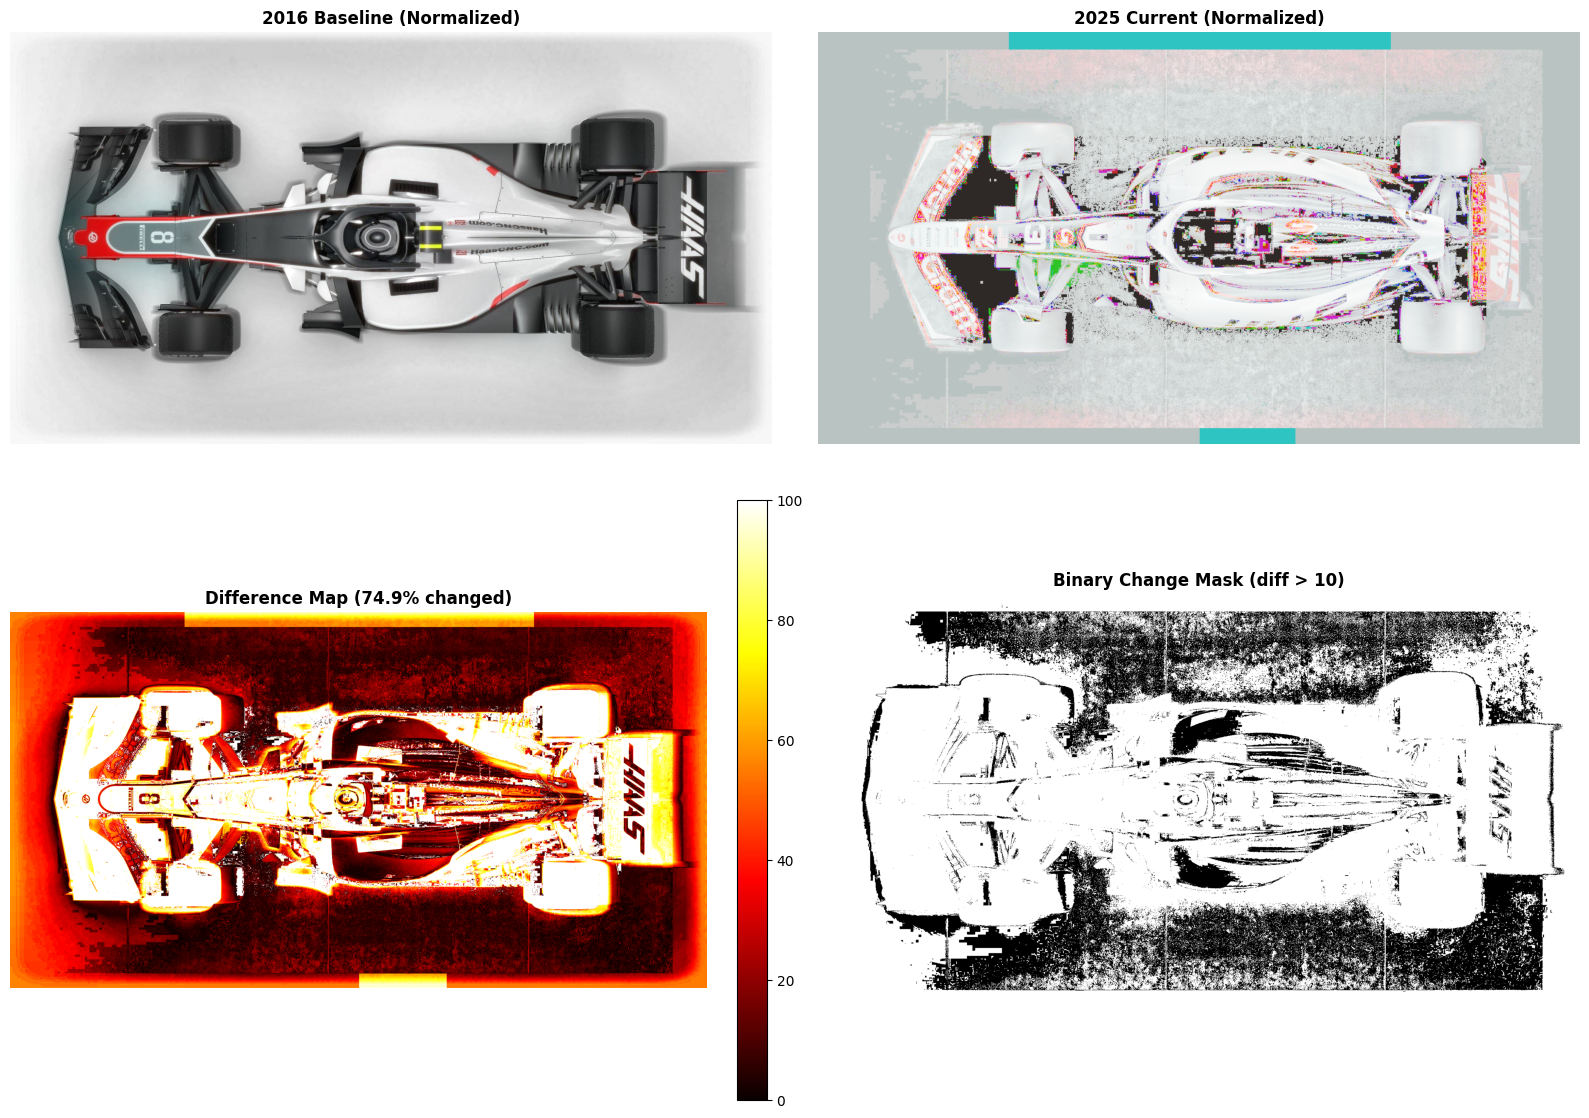


📊 Heatmap Interpretation:
  - WHITE/YELLOW in heatmap = Large differences (wings, livery)
  - RED in heatmap = Moderate differences
  - BLACK in heatmap = No change
  - Binary mask shows WHERE changes should be detected


In [40]:
# ============================================================================
# DIAGNOSTIC: Visual Difference Analysis
# ============================================================================

import cv2
import numpy as np
import matplotlib.pyplot as plt

print("\n🔬 DIAGNOSTIC: Analyzing pixel-level differences...")

# Compute absolute difference
diff = cv2.absdiff(baseline_rgb, current_rgb)
diff_gray = cv2.cvtColor(diff, cv2.COLOR_RGB2GRAY)

# Calculate statistics
total_pixels = diff_gray.size
changed_pixels_5 = np.count_nonzero(diff_gray > 5)   # Very sensitive
changed_pixels_10 = np.count_nonzero(diff_gray > 10) # Moderate
changed_pixels_20 = np.count_nonzero(diff_gray > 20) # Only major changes

change_pct_5 = (changed_pixels_5 / total_pixels) * 100
change_pct_10 = (changed_pixels_10 / total_pixels) * 100
change_pct_20 = (changed_pixels_20 / total_pixels) * 100

print(f"\n📊 Pixel Difference Statistics:")
print(f"  Total pixels: {total_pixels:,}")
print(f"  Changed (diff > 5):  {changed_pixels_5:,} ({change_pct_5:.2f}%)")
print(f"  Changed (diff > 10): {changed_pixels_10:,} ({change_pct_10:.2f}%)")
print(f"  Changed (diff > 20): {changed_pixels_20:,} ({change_pct_20:.2f}%)")

if change_pct_10 < 1:
    print("\n⚠️ WARNING: <1% difference - images are VERY similar!")
    print("   Check if correct images were uploaded")
elif change_pct_10 > 50:
    print("\n⚠️ WARNING: >50% difference - possible alignment failure!")
else:
    print(f"\n✓ Good: {change_pct_10:.1f}% difference is reasonable")

# ============================================================================
# Visualize Difference Heatmap
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top-left: Baseline
axes[0, 0].imshow(baseline_rgb)
axes[0, 0].set_title('2016 Baseline (Normalized)', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

# Top-right: Current
axes[0, 1].imshow(current_rgb)
axes[0, 1].set_title('2025 Current (Normalized)', fontsize=12, fontweight='bold')
axes[0, 1].axis('off')

# Bottom-left: Difference heatmap
heatmap = axes[1, 0].imshow(diff_gray, cmap='hot', vmin=0, vmax=100)
axes[1, 0].set_title(f'Difference Map ({change_pct_10:.1f}% changed)', fontsize=12, fontweight='bold')
axes[1, 0].axis('off')
plt.colorbar(heatmap, ax=axes[1, 0], fraction=0.046, pad=0.04)

# Bottom-right: Binary mask (threshold at 10)
binary_diff = (diff_gray > 10).astype(np.uint8) * 255
axes[1, 1].imshow(binary_diff, cmap='gray')
axes[1, 1].set_title('Binary Change Mask (diff > 10)', fontsize=12, fontweight='bold')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("\n📊 Heatmap Interpretation:")
print("  - WHITE/YELLOW in heatmap = Large differences (wings, livery)")
print("  - RED in heatmap = Moderate differences")
print("  - BLACK in heatmap = No change")
print("  - Binary mask shows WHERE changes should be detected")

📊 Visualizing change detection results...


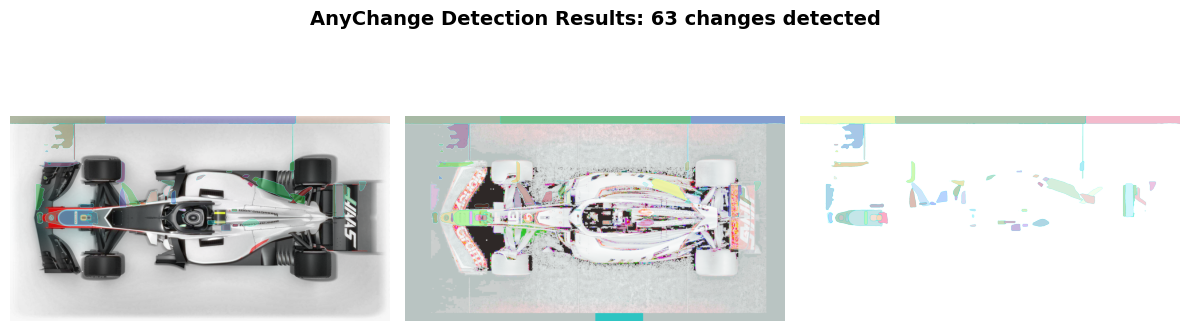


📊 Visualization Explanation:
  Left panel:   2016 Baseline with change masks overlaid
  Middle panel: 2025 Current with change masks overlaid
  Right panel:  Change masks on white background

  Each colored region = detected change
  Cyan boundaries = mask edges


In [41]:
# ============================================================================
# STEP 5: Visualize Change Detection Results
# ============================================================================

from torchange.models.segment_any_change import show_change_masks
import matplotlib.pyplot as plt

print("📊 Visualizing change detection results...")

if len(change_masks['rles']) > 0:
    # Use the official visualization function
    fig, axes = show_change_masks(baseline_rgb, current_rgb, change_masks)

    # Add title
    fig.suptitle(
        f'AnyChange Detection Results: {len(change_masks["rles"])} changes detected',
        fontsize=14,
        fontweight='bold',
        y=0.98
    )

    # Adjust layout
    plt.tight_layout()
    plt.show()

    print("\n📊 Visualization Explanation:")
    print("  Left panel:   2016 Baseline with change masks overlaid")
    print("  Middle panel: 2025 Current with change masks overlaid")
    print("  Right panel:  Change masks on white background")
    print("\n  Each colored region = detected change")
    print("  Cyan boundaries = mask edges")

else:
    print("⚠️ No changes to visualize")

    # Show images side-by-side for comparison
    import supervision as sv
    sv.plot_images_grid(
        images=[baseline_rgb, current_rgb],
        grid_size=(1, 2),
        titles=['2016 Baseline (Normalized)', '2025 Current (Normalized)'],
        size=(16, 8)
    )
    print("\nNo changes detected - images appear identical after normalization")

In [42]:
# ============================================================================
# STEP 5: Post-Process and Save Change Detection Results
# ============================================================================

import pickle
import json
from torchange.models.segment_any_change.segment_anything.utils.amg import rle_to_mask

print("\n💾 Post-processing and saving results...")

if len(change_masks['rles']) > 0:
    
    # -----------------------------------------------------------------------
    # Create Binary Change Map
    # -----------------------------------------------------------------------
    print("\n📊 Creating binary change map...")
    
    h, w = baseline_rgb.shape[:2]
    binary_change_map = np.zeros((h, w), dtype=np.uint8)
    
    # Combine all change masks into one binary map
    for rle in change_masks['rles']:
        mask = rle_to_mask(rle)
        binary_change_map = np.maximum(binary_change_map, mask.astype(np.uint8) * 255)
    
    print(f"✓ Binary change map created: {binary_change_map.shape}")
    print(f"  Changed pixels: {(binary_change_map > 0).sum()} / {h*w} ({(binary_change_map > 0).sum()/(h*w)*100:.2f}%)")
    
    # Save binary change map
    change_map_path = os.path.join(OUTPUT_DIR, "change_map_binary.png")
    cv2.imwrite(change_map_path, binary_change_map)
    print(f"  Saved: {change_map_path}")
    
    # -----------------------------------------------------------------------
    # Create Colored Overlay
    # -----------------------------------------------------------------------
    print("\n🎨 Creating colored change overlay...")
    
    # Red overlay on baseline
    baseline_overlay = baseline_normalized.copy()
    baseline_overlay[binary_change_map > 0] = [0, 0, 255]  # Red (BGR)
    baseline_overlay = cv2.addWeighted(baseline_normalized, 0.7, baseline_overlay, 0.3, 0)
    
    # Green overlay on current
    current_overlay = current_normalized.copy()
    current_overlay[binary_change_map > 0] = [0, 255, 0]  # Green (BGR)
    current_overlay = cv2.addWeighted(current_normalized, 0.7, current_overlay, 0.3, 0)
    
    # Save overlays
    cv2.imwrite(os.path.join(OUTPUT_DIR, "baseline_with_changes.jpg"), baseline_overlay)
    cv2.imwrite(os.path.join(OUTPUT_DIR, "current_with_changes.jpg"), current_overlay)
    print("✓ Colored overlays saved")
    
    # -----------------------------------------------------------------------
    # Extract Change Regions (for future classification)
    # -----------------------------------------------------------------------
    print("\n📦 Extracting individual change regions...")
    
    change_regions = []
    for i, (rle, box) in enumerate(zip(change_masks['rles'], change_masks['boxes'])):
        mask = rle_to_mask(rle)
        
        # Get bounding box
        if isinstance(box, torch.Tensor):
            box = box.cpu().numpy()
        x1, y1, x2, y2 = box.astype(int)
        
        # Crop region from current image
        region = current_normalized[y1:y2, x1:x2].copy()
        
        # Apply mask to isolate change
        region_mask = mask[y1:y2, x1:x2]
        region[~region_mask] = 0  # Black out non-change pixels
        
        change_regions.append({
            'id': i,
            'bbox': [int(x1), int(y1), int(x2), int(y2)],
            'area': int(change_masks['areas'][i]) if 'areas' in change_masks._stats else 0,
            'confidence': float(change_masks['change_confidence'][i]),
            'region_image': region,
            'mask': mask
        })
    
    print(f"✓ Extracted {len(change_regions)} change regions")
    
    # -----------------------------------------------------------------------
    # Save Structured Data
    # -----------------------------------------------------------------------
    print("\n💾 Saving structured data...")
    
    # Save change_regions for Step 6 (classification)
    with open(os.path.join(OUTPUT_DIR, 'change_regions.pkl'), 'wb') as f:
        pickle.dump(change_regions, f)
    print("  ✓ Saved: change_regions.pkl")
    
    # Save metadata as JSON
    metadata = {
        'total_changes': len(change_masks['rles']),
        'high_confidence_changes': int((change_masks['change_confidence'] > 0.5).sum()),
        'total_changed_pixels': int((binary_change_map > 0).sum()),
        'image_size': [h, w],
        'changes': [
            {
                'id': i,
                'bbox': change_regions[i]['bbox'],
                'area': change_regions[i]['area'],
                'confidence': change_regions[i]['confidence']
            }
            for i in range(len(change_regions))
        ]
    }
    
    with open(os.path.join(OUTPUT_DIR, 'change_detection_metadata.json'), 'w') as f:
        json.dump(metadata, f, indent=2)
    print("  ✓ Saved: change_detection_metadata.json")
    
    print("\n✅ All results saved to:", OUTPUT_DIR)
    
else:
    print("⚠️ No changes detected - nothing to save")
    change_regions = []
    binary_change_map = np.zeros((h, w), dtype=np.uint8)


💾 Post-processing and saving results...

📊 Creating binary change map...
✓ Binary change map created: (1200, 2220)
  Changed pixels: 238361 / 2664000 (8.95%)
  Saved: /home/jovyan/outputs/change_map_binary.png

🎨 Creating colored change overlay...
✓ Colored overlays saved

📦 Extracting individual change regions...
✓ Extracted 63 change regions

💾 Saving structured data...
  ✓ Saved: change_regions.pkl
  ✓ Saved: change_detection_metadata.json

✅ All results saved to: /home/jovyan/outputs


📊 Creating final comparison visualization...


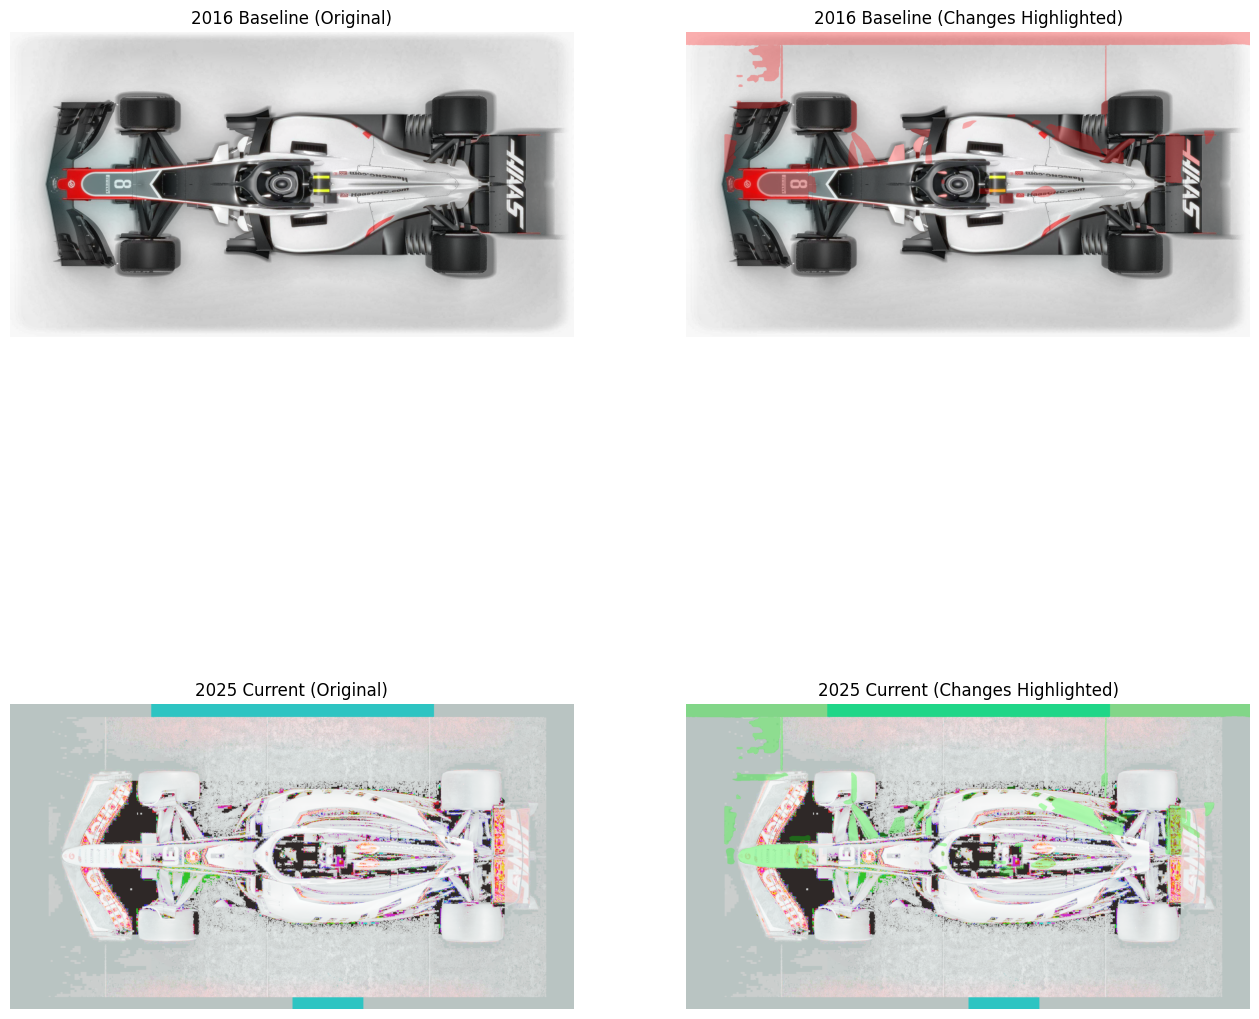


📊 Comparison panels:
  Top-left:     2016 baseline (no overlay)
  Top-right:    2016 baseline with RED change highlights
  Bottom-left:  2025 current (no overlay)
  Bottom-right: 2025 current with GREEN change highlights


In [43]:
# ============================================================================
# STEP 5: Final Visualization - Side-by-Side Comparison
# ============================================================================

import supervision as sv

print("📊 Creating final comparison visualization...")

if len(change_masks['rles']) > 0:
    
    # Show 4-panel comparison
    sv.plot_images_grid(
        images=[
            baseline_normalized,
            baseline_overlay,
            current_normalized,
            current_overlay
        ],
        grid_size=(2, 2),
        titles=[
            '2016 Baseline (Original)',
            '2016 Baseline (Changes Highlighted)',
            '2025 Current (Original)',
            '2025 Current (Changes Highlighted)'
        ],
        size=(16, 16)
    )
    
    print("\n📊 Comparison panels:")
    print("  Top-left:     2016 baseline (no overlay)")
    print("  Top-right:    2016 baseline with RED change highlights")
    print("  Bottom-left:  2025 current (no overlay)")
    print("  Bottom-right: 2025 current with GREEN change highlights")
    
else:
    print("⚠️ No changes detected - showing original images only")
    
    sv.plot_images_grid(
        images=[baseline_normalized, current_normalized],
        grid_size=(1, 2),
        titles=['2016 Baseline', '2025 Current'],
        size=(16, 8)
    )

In [255]:
# ============================================================================
# STEP 6: INSTALL CLIP FOR ZERO-SHOT CLASSIFICATION
# ============================================================================

print("="*70)
print("🔧 STEP 6: INSTALLING CLIP DEPENDENCIES")
print("="*70)

!pip install -q transformers>=4.30 torch torchvision pillow

print("\n✅ CLIP dependencies installed")

🔧 STEP 6: INSTALLING CLIP DEPENDENCIES

✅ CLIP dependencies installed


In [2]:
pip install --upgrade torch transformers huggingface_hub

  Using cached huggingface_hub-1.1.4-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.8/899.8 MB 58.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 65.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 146.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 91.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 53.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 86.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 89.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 68.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 

In [257]:
pip install --upgrade transformers huggingface_hub requests

  Using cached huggingface_hub-1.1.4-py3-none-any.whl.metadata (13 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 1.2.11 requires opencv-python-headless==4.10.0.84, but you have opencv-python-headless 4.12.0.88 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip uninstall torch torchvision -y

Found existing installation: torch 2.9.1
Uninstalling torch-2.9.1:
  Successfully uninstalled torch-2.9.1
Found existing installation: torchvision 0.20.1+cu124
Uninstalling torchvision-0.20.1+cu124:
  Successfully uninstalled torchvision-0.20.1+cu124
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torch torchvision

  Using cached torch-2.9.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (30 kB)
Using cached torch-2.9.1-cp311-cp311-manylinux_2_28_x86_64.whl (899.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 82.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.1+cu124 requires torch==2.5.1, but you have torch 2.9.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# ============================================================================
# STEP 6A: LOAD CLIP MODEL FOR ZERO-SHOT CLASSIFICATION
# ============================================================================

from transformers import CLIPProcessor, CLIPModel
import torch

print("\n" + "="*70)
print("🤖 STEP 6A: LOADING CLIP MODEL")
print("="*70)

print("\n📦 Loading CLIP model (openai/clip-vit-base-patch32)...")

# Load pre-trained CLIP model and processor
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Move to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model = clip_model.to(device)
clip_model.eval()  # Set to evaluation mode

print(f"✓ CLIP model loaded successfully")
print(f"  Device: {device}")
print(f"  Model type: openai/clip-vit-base-patch32")

print("\n" + "="*70)


🤖 STEP 6A: LOADING CLIP MODEL

📦 Loading CLIP model (openai/clip-vit-base-patch32)...


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

✓ CLIP model loaded successfully
  Device: cuda
  Model type: openai/clip-vit-base-patch32



In [44]:
# ============================================================================
# STEP 6B: DEFINE F1 CAR PART LABELS
# ============================================================================

print("\n" + "="*70)
print("🏎️ STEP 6B: DEFINING F1 PART LABELS")
print("="*70)

# Define F1 car part labels for zero-shot classification
# These are the possible parts that could have changed between 2016 and 2025
F1_PART_LABELS = [
    "front wing",
    "rear wing",
    "side pod",
    "floor",
    "diffuser",
    "nose cone",
    "halo",
    "engine cover",
    "rear suspension",
    "front suspension",
    "wheel",
    "tire",
    "brake duct",
    "mirror",
    "livery design",
    "sponsor logo",
    "paint scheme",
    "body panel",
    "aerodynamic element",
    "underbody"
]

print(f"\n✓ Defined {len(F1_PART_LABELS)} F1 part labels:")
for i, label in enumerate(F1_PART_LABELS, 1):
    print(f"  {i:2d}. {label}")

# Create text descriptions for CLIP (better context)
part_descriptions = [f"a photo of a Formula 1 car {label}" for label in F1_PART_LABELS]

print(f"\n✓ Created contextual descriptions for CLIP")
print(f"  Example: '{part_descriptions[0]}'")

print("\n" + "="*70)


🏎️ STEP 6B: DEFINING F1 PART LABELS

✓ Defined 20 F1 part labels:
   1. front wing
   2. rear wing
   3. side pod
   4. floor
   5. diffuser
   6. nose cone
   7. halo
   8. engine cover
   9. rear suspension
  10. front suspension
  11. wheel
  12. tire
  13. brake duct
  14. mirror
  15. livery design
  16. sponsor logo
  17. paint scheme
  18. body panel
  19. aerodynamic element
  20. underbody

✓ Created contextual descriptions for CLIP
  Example: 'a photo of a Formula 1 car front wing'



In [45]:
# ============================================================================
# STEP 6C: CLASSIFY DETECTED CHANGE REGIONS WITH CLIP
# ============================================================================

import numpy as np
from PIL import Image
from scipy.special import softmax

print("\n" + "="*70)
print("🔍 STEP 6C: CLASSIFYING CHANGE REGIONS")
print("="*70)

# Check if we have change regions from Step 5
if 'change_regions' not in locals() or len(change_regions) == 0:
    print("❌ ERROR: No change regions found!")
    print("   Please run Step 5 (Change Detection) first")
    raise ValueError("Missing change_regions from Step 5")

print(f"\n📊 Processing {len(change_regions)} detected change regions...")

# ============================================================================
# Function to classify a single region
# ============================================================================

def classify_change_region(region_dict, clip_model, clip_processor, labels, descriptions):
    """
    Classify a change region using CLIP zero-shot classification.
    
    Args:
        region_dict (dict): Change region info with 'region_image' key
        clip_model: Loaded CLIP model
        clip_processor: CLIP processor
        labels (list): List of part label names
        descriptions (list): List of contextualized descriptions
    
    Returns:
        dict: Classification results with top predictions
    """
    # Get the region image (BGR format from OpenCV)
    region_bgr = region_dict['region_image']
    
    # Convert BGR to RGB and create PIL Image
    region_rgb = cv2.cvtColor(region_bgr, cv2.COLOR_BGR2RGB)
    region_pil = Image.fromarray(region_rgb)
    
    # Prepare inputs for CLIP
    inputs = clip_processor(
        text=descriptions,
        images=region_pil,
        return_tensors="pt",
        padding=True
    )
    
    # Move inputs to device
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    # Run CLIP inference
    with torch.no_grad():
        outputs = clip_model(**inputs)
    
    # Get similarity scores (logits)
    logits_per_image = outputs.logits_per_image.cpu().numpy()[0]
    
    # Apply softmax to get probabilities
    probs = softmax(logits_per_image)
    
    # Get top 3 predictions
    top3_indices = np.argsort(probs)[-3:][::-1]  # Descending order
    
    results = {
        'top1_label': labels[top3_indices[0]],
        'top1_confidence': float(probs[top3_indices[0]]),
        'top2_label': labels[top3_indices[1]],
        'top2_confidence': float(probs[top3_indices[1]]),
        'top3_label': labels[top3_indices[2]],
        'top3_confidence': float(probs[top3_indices[2]]),
        'all_probs': probs.tolist()
    }
    
    return results

# ============================================================================
# Classify all change regions
# ============================================================================

classified_changes = []

import time
start_time = time.time()

for i, region_info in enumerate(change_regions):
    try:
        # Classify the region
        classification = classify_change_region(
            region_info,
            clip_model,
            clip_processor,
            F1_PART_LABELS,
            part_descriptions
        )
        
        # Combine with existing region info
        classified_change = {
            **region_info,  # Original bbox, area, confidence, mask
            **classification  # Add CLIP classification results
        }
        
        classified_changes.append(classified_change)
        
        # Progress update every 5 regions
        if (i + 1) % 5 == 0 or (i + 1) == len(change_regions):
            print(f"  Progress: {i+1}/{len(change_regions)} regions classified")
        
    except Exception as e:
        print(f"  ⚠️ Failed to classify region {i}: {str(e)}")
        continue

elapsed = time.time() - start_time

print(f"\n✅ Classification complete! (took {elapsed:.1f} seconds)")
print(f"   Successfully classified: {len(classified_changes)}/{len(change_regions)} regions")

# ============================================================================
# Display classification summary
# ============================================================================

print("\n📊 Classification Summary:")
print(f"  Total classified changes: {len(classified_changes)}")

# Count occurrences of each part
from collections import Counter
part_counts = Counter([c['top1_label'] for c in classified_changes])

print(f"\n  Detected part types:")
for part, count in part_counts.most_common():
    avg_conf = np.mean([c['top1_confidence'] for c in classified_changes if c['top1_label'] == part])
    print(f"    {part:20s}: {count:2d} occurrences (avg conf: {avg_conf:.3f})")

# Show high-confidence detections
high_conf_threshold = 0.3
high_conf_changes = [c for c in classified_changes if c['top1_confidence'] > high_conf_threshold]

print(f"\n  High-confidence classifications (>{high_conf_threshold}):")
print(f"    Count: {len(high_conf_changes)}/{len(classified_changes)}")

if len(high_conf_changes) > 0:
    print(f"\n  Top 5 high-confidence detections:")
    sorted_changes = sorted(high_conf_changes, key=lambda x: x['top1_confidence'], reverse=True)[:5]
    
    for i, change in enumerate(sorted_changes, 1):
        print(f"    {i}. {change['top1_label']:20s} - {change['top1_confidence']:.3f} confidence")
        print(f"       Area: {change['area']} px | Bbox: {change['bbox']}")

print("\n" + "="*70)


🔍 STEP 6C: CLASSIFYING CHANGE REGIONS

📊 Processing 63 detected change regions...
  Progress: 5/63 regions classified
  Progress: 10/63 regions classified
  Progress: 15/63 regions classified
  Progress: 20/63 regions classified
  Progress: 25/63 regions classified
  Progress: 30/63 regions classified
  Progress: 35/63 regions classified
  Progress: 40/63 regions classified
  Progress: 45/63 regions classified
  Progress: 50/63 regions classified
  Progress: 55/63 regions classified
  Progress: 60/63 regions classified
  Progress: 63/63 regions classified

✅ Classification complete! (took 1.1 seconds)
   Successfully classified: 63/63 regions

📊 Classification Summary:
  Total classified changes: 63

  Detected part types:
    sponsor logo        : 40 occurrences (avg conf: 0.487)
    aerodynamic element : 14 occurrences (avg conf: 0.322)
    nose cone           :  6 occurrences (avg conf: 0.338)
    livery design       :  2 occurrences (avg conf: 0.270)
    body panel          :  1 o


📊 STEP 6D: VISUALIZING CLASSIFIED CHANGES


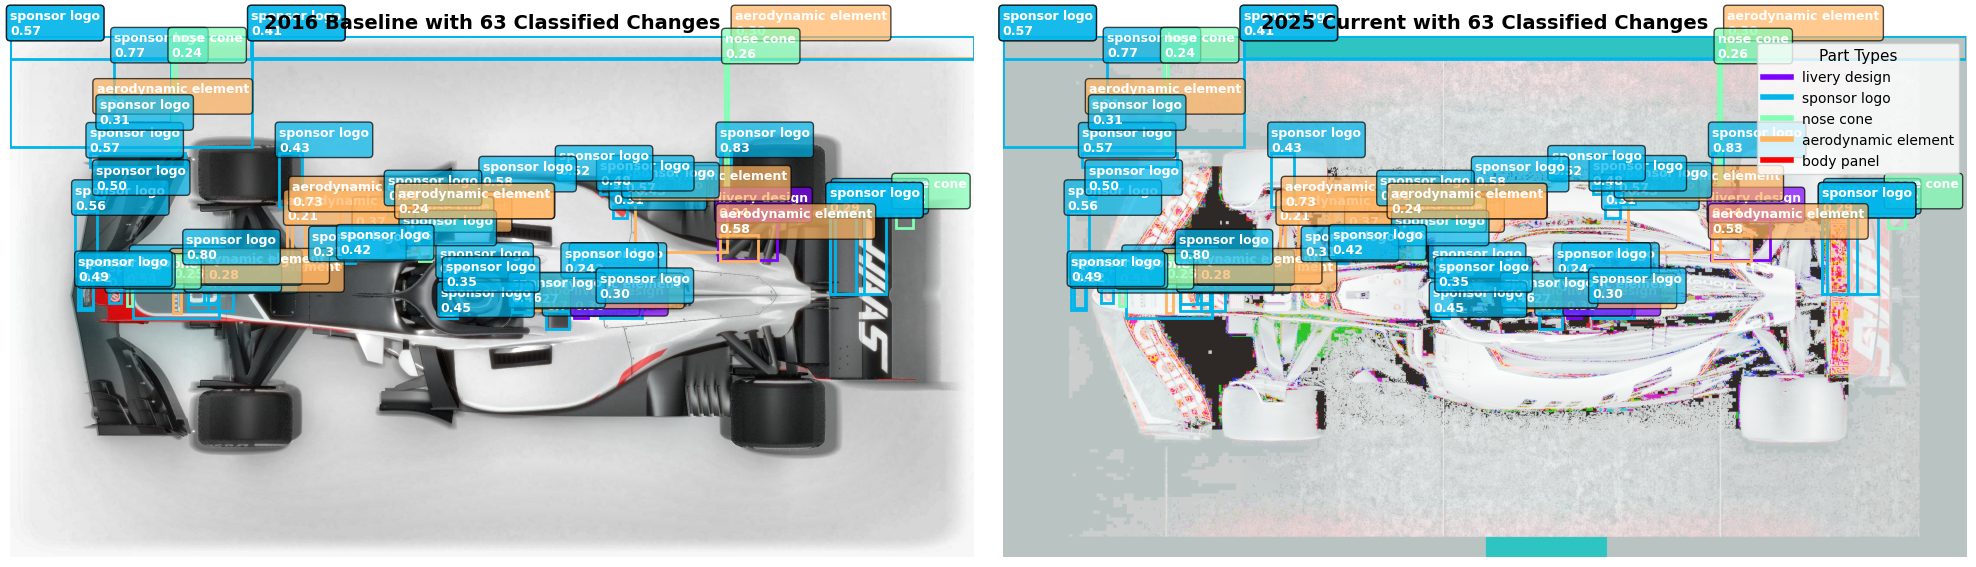


✅ Visualization saved to: /home/jovyan/outputs/classified_changes.png



In [46]:
# ============================================================================
# STEP 6D: VISUALIZE CLASSIFIED CHANGES
# ============================================================================

import matplotlib.pyplot as plt
import matplotlib.patches as patches

print("\n" + "="*70)
print("📊 STEP 6D: VISUALIZING CLASSIFIED CHANGES")
print("="*70)

if len(classified_changes) == 0:
    print("⚠️ No classified changes to visualize")
else:
    # Create visualization
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    
    # Left: Baseline image with annotations
    axes[0].imshow(cv2.cvtColor(baseline_normalized, cv2.COLOR_BGR2RGB))
    axes[0].set_title(f'2016 Baseline with {len(classified_changes)} Classified Changes', 
                      fontsize=14, fontweight='bold')
    axes[0].axis('off')
    
    # Right: Current image with annotations
    axes[1].imshow(cv2.cvtColor(current_normalized, cv2.COLOR_BGR2RGB))
    axes[1].set_title(f'2025 Current with {len(classified_changes)} Classified Changes', 
                      fontsize=14, fontweight='bold')
    axes[1].axis('off')
    
    # Color map for different parts
    part_colors = {}
    unique_parts = list(set([c['top1_label'] for c in classified_changes]))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_parts)))
    
    for part, color in zip(unique_parts, colors):
        part_colors[part] = color
    
    # Draw bounding boxes and labels on both images
    for change in classified_changes:
        x1, y1, x2, y2 = change['bbox']
        part = change['top1_label']
        conf = change['top1_confidence']
        color = part_colors[part]
        
        # Only show high-confidence predictions
        if conf > 0.2:
            # Draw on both axes
            for ax in axes:
                # Bounding box
                rect = patches.Rectangle(
                    (x1, y1), x2-x1, y2-y1,
                    linewidth=2, edgecolor=color, facecolor='none'
                )
                ax.add_patch(rect)
                
                # Label with background
                label_text = f"{part}\n{conf:.2f}"
                ax.text(
                    x1, y1-5,
                    label_text,
                    fontsize=9,
                    color='white',
                    weight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.7)
                )
    
    # Add legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color=part_colors[part], lw=4, label=part)
        for part in unique_parts
    ]
    axes[1].legend(
        handles=legend_elements,
        loc='upper right',
        fontsize=10,
        title='Part Types',
        title_fontsize=11
    )
    
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, 'classified_changes.png'), dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\n✅ Visualization saved to:", os.path.join(OUTPUT_DIR, 'classified_changes.png'))

print("\n" + "="*70)

In [47]:
# ============================================================================
# STEP 6E: SAVE CLASSIFICATION RESULTS
# ============================================================================

import json
import pandas as pd

print("\n" + "="*70)
print("💾 STEP 6E: SAVING CLASSIFICATION RESULTS")
print("="*70)

if len(classified_changes) > 0:
    
    # -----------------------------------------------------------------------
    # Save as JSON (complete data)
    # -----------------------------------------------------------------------
    print("\n📄 Saving JSON results...")
    
    # Prepare JSON-serializable data (exclude numpy arrays)
    json_data = []
    for change in classified_changes:
        json_item = {
            'id': change['id'],
            'bbox': change['bbox'],
            'area': change['area'],
            'change_confidence': change['confidence'],
            'classified_part': change['top1_label'],
            'classification_confidence': change['top1_confidence'],
            'top2_part': change['top2_label'],
            'top2_confidence': change['top2_confidence'],
            'top3_part': change['top3_label'],
            'top3_confidence': change['top3_confidence']
        }
        json_data.append(json_item)
    
    json_path = os.path.join(OUTPUT_DIR, 'classified_changes.json')
    with open(json_path, 'w') as f:
        json.dump(json_data, f, indent=2)
    
    print(f"  ✓ Saved: {json_path}")
    
    # -----------------------------------------------------------------------
    # Save as CSV (tabular format)
    # -----------------------------------------------------------------------
    print("\n📊 Saving CSV results...")
    
    df = pd.DataFrame(json_data)
    csv_path = os.path.join(OUTPUT_DIR, 'classified_changes.csv')
    df.to_csv(csv_path, index=False)
    
    print(f"  ✓ Saved: {csv_path}")
    
    # -----------------------------------------------------------------------
    # Save full pickle (includes images/masks)
    # -----------------------------------------------------------------------
    print("\n🗄️ Saving full pickle data...")
    
    import pickle
    pkl_path = os.path.join(OUTPUT_DIR, 'classified_changes.pkl')
    with open(pkl_path, 'wb') as f:
        pickle.dump(classified_changes, f)
    
    print(f"  ✓ Saved: {pkl_path}")
    
    # -----------------------------------------------------------------------
    # Generate summary statistics
    # -----------------------------------------------------------------------
    print("\n📈 Summary Statistics:")
    print(f"  Total changes detected: {len(classified_changes)}")
    print(f"  Unique part types: {len(part_counts)}")
    print(f"  High-confidence (>0.3): {len([c for c in classified_changes if c['top1_confidence'] > 0.3])}")
    print(f"  Average classification confidence: {np.mean([c['top1_confidence'] for c in classified_changes]):.3f}")
    
    print(f"\n✅ All classification results saved to: {OUTPUT_DIR}")

else:
    print("⚠️ No classified changes to save")

print("\n" + "="*70)


💾 STEP 6E: SAVING CLASSIFICATION RESULTS

📄 Saving JSON results...
  ✓ Saved: /home/jovyan/outputs/classified_changes.json

📊 Saving CSV results...
  ✓ Saved: /home/jovyan/outputs/classified_changes.csv

🗄️ Saving full pickle data...
  ✓ Saved: /home/jovyan/outputs/classified_changes.pkl

📈 Summary Statistics:
  Total changes detected: 63
  Unique part types: 5
  High-confidence (>0.3): 46
  Average classification confidence: 0.424

✅ All classification results saved to: /home/jovyan/outputs



In [48]:
# ============================================================================
# STEP 6F: GENERATE DETAILED CHANGE REPORT
# ============================================================================

print("\n" + "="*70)
print("📋 STEP 6F: DETAILED CHANGE REPORT")
print("="*70)

if len(classified_changes) > 0:
    
    print(f"\n🏎️ F1 CAR CHANGE DETECTION REPORT")
    print(f"   2016 Baseline vs. 2025 Current")
    print(f"   {'-'*60}")
    
    # Group by part type
    from collections import defaultdict
    changes_by_part = defaultdict(list)
    
    for change in classified_changes:
        changes_by_part[change['top1_label']].append(change)
    
    # Report each part type
    for part_name in sorted(changes_by_part.keys()):
        changes = changes_by_part[part_name]
        avg_conf = np.mean([c['top1_confidence'] for c in changes])
        total_area = sum([c['area'] for c in changes])
        
        print(f"\n   {part_name.upper()}")
        print(f"   {'-'*60}")
        print(f"   Occurrences: {len(changes)}")
        print(f"   Avg Confidence: {avg_conf:.3f}")
        print(f"   Total Changed Area: {total_area} pixels")
        
        # Show individual instances
        for i, change in enumerate(changes, 1):
            x1, y1, x2, y2 = change['bbox']
            print(f"     #{i}: conf={change['top1_confidence']:.3f}, "
                  f"area={change['area']}px, bbox=[{x1},{y1},{x2},{y2}]")
    
    # Overall summary
    print(f"\n   {'='*60}")
    print(f"   OVERALL SUMMARY")
    print(f"   {'='*60}")
    print(f"   Total Changes: {len(classified_changes)}")
    print(f"   Unique Part Types: {len(changes_by_part)}")
    print(f"   Total Changed Pixels: {sum([c['area'] for c in classified_changes])}")
    print(f"   Average Classification Confidence: {np.mean([c['top1_confidence'] for c in classified_changes]):.3f}")
    
    # Highlight most significant changes
    print(f"\n   🔍 MOST SIGNIFICANT CHANGES (Top 5 by area):")
    sorted_by_area = sorted(classified_changes, key=lambda x: x['area'], reverse=True)[:5]
    for i, change in enumerate(sorted_by_area, 1):
        print(f"     {i}. {change['top1_label']:20s} - {change['area']:6d}px "
              f"(conf: {change['top1_confidence']:.3f})")

else:
    print("⚠️ No changes detected")

print("\n" + "="*70)
print("✅ STEP 6 COMPLETE: Few-Shot Classification")
print("="*70)


📋 STEP 6F: DETAILED CHANGE REPORT

🏎️ F1 CAR CHANGE DETECTION REPORT
   2016 Baseline vs. 2025 Current
   ------------------------------------------------------------

   AERODYNAMIC ELEMENT
   ------------------------------------------------------------
   Occurrences: 14
   Avg Confidence: 0.322
   Total Changed Area: 66577 pixels
     #1: conf=0.371, area=3194px, bbox=[796,441,861,510]
     #2: conf=0.302, area=27856px, bbox=[1669,0,2219,51]
     #3: conf=0.259, area=2291px, bbox=[410,579,478,616]
     #4: conf=0.248, area=1820px, bbox=[895,410,940,472]
     #5: conf=0.194, area=2422px, bbox=[1955,420,2021,561]
     #6: conf=0.214, area=3302px, bbox=[638,425,679,538]
     #7: conf=0.249, area=1367px, bbox=[376,560,393,637]
     #8: conf=0.214, area=205px, bbox=[199,169,222,177]
     #9: conf=0.735, area=5743px, bbox=[650,394,759,531]
     #10: conf=0.274, area=853px, bbox=[1193,617,1258,630]
     #11: conf=0.182, area=156px, bbox=[198,270,216,279]
     #12: conf=0.448, area=11847px

In [49]:
# ============================================================================
# API SERVER SETUP: INSTALL FASTAPI AND DEPENDENCIES
# ============================================================================

print("="*70)
print("🌐 API SERVER SETUP: INSTALLING DEPENDENCIES")
print("="*70)

!pip install -q fastapi uvicorn python-multipart aiofiles pyngrok nest-asyncio

print("\n✅ FastAPI dependencies installed:")
print("  - fastapi: Web framework")
print("  - uvicorn: ASGI server")
print("  - python-multipart: File upload support")
print("  - aiofiles: Async file operations")
print("  - pyngrok: Public URL tunnel")
print("  - nest-asyncio: Run async in Jupyter")

🌐 API SERVER SETUP: INSTALLING DEPENDENCIES


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



✅ FastAPI dependencies installed:
  - fastapi: Web framework
  - uvicorn: ASGI server
  - python-multipart: File upload support
  - aiofiles: Async file operations
  - pyngrok: Public URL tunnel
  - nest-asyncio: Run async in Jupyter


In [50]:
# ============================================================================
# API SERVER: FASTAPI APPLICATION
# ============================================================================

from fastapi import FastAPI, File, UploadFile, HTTPException, BackgroundTasks
from fastapi.responses import JSONResponse, FileResponse
from fastapi.middleware.cors import CORSMiddleware
import shutil
import uuid
import json
from pathlib import Path
from typing import Dict, List
import base64
import io

print("\n" + "="*70)
print("🚀 CREATING FASTAPI APPLICATION")
print("="*70)

# Initialize FastAPI app
app = FastAPI(
    title="F1 Change Detection API",
    description="AI-powered F1 car visual inspection system",
    version="1.0.0"
)

# Enable CORS for frontend access
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # In production, specify your frontend domain
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

# Create directories for storing uploads and results
API_UPLOAD_DIR = Path(OUTPUT_DIR) / "api_uploads"
API_RESULTS_DIR = Path(OUTPUT_DIR) / "api_results"
API_UPLOAD_DIR.mkdir(exist_ok=True)
API_RESULTS_DIR.mkdir(exist_ok=True)

# Job storage (in production, use Redis or database)
jobs_db: Dict[str, Dict] = {}

print(f"✓ FastAPI application created")
print(f"  Upload directory: {API_UPLOAD_DIR}")
print(f"  Results directory: {API_RESULTS_DIR}")

# ============================================================================
# HELPER FUNCTIONS
# ============================================================================

def image_to_base64(image_path: Path) -> str:
    """Convert image to base64 string for JSON response"""
    with open(image_path, "rb") as f:
        return base64.b64encode(f.read()).decode()

def save_upload_file(upload_file: UploadFile, destination: Path):
    """Save uploaded file to disk"""
    with destination.open("wb") as buffer:
        shutil.copyfileobj(upload_file.file, buffer)

# ============================================================================
# API ENDPOINTS
# ============================================================================

@app.get("/")
async def root():
    """Health check endpoint"""
    return {
        "status": "online",
        "service": "F1 Change Detection API",
        "version": "1.0.0",
        "endpoints": {
            "segment": "/segment",
            "align": "/align",
            "detect_changes": "/detect-changes",
            "classify_parts": "/classify-parts",
            "full_pipeline": "/pipeline",
            "results": "/results/{job_id}"
        }
    }

@app.get("/health")
async def health_check():
    """Check if models are loaded"""
    return {
        "status": "healthy",
        "models": {
            "sam": sam is not None,
            "anychange": anychange_model is not None,
            "clip": clip_model is not None
        },
        "gpu_available": torch.cuda.is_available(),
        "device": str(DEVICE)
    }

print("✓ Root and health endpoints defined")


🚀 CREATING FASTAPI APPLICATION
✓ FastAPI application created
  Upload directory: /home/jovyan/outputs/api_uploads
  Results directory: /home/jovyan/outputs/api_results
✓ Root and health endpoints defined


In [51]:
# ============================================================================
# ENDPOINT 1: SAM SEGMENTATION
# ============================================================================

@app.post("/segment")
async def segment_image(
    image: UploadFile = File(..., description="Image to segment")
):
    """
    Segment image using SAM (Segment Anything Model)
    
    Returns:
        - Segmentation masks
        - Annotated image (base64)
        - Number of detected objects
    """
    try:
        job_id = str(uuid.uuid4())
        
        # Save uploaded image
        image_path = API_UPLOAD_DIR / f"{job_id}_input.jpg"
        save_upload_file(image, image_path)
        
        # Read and process image
        image_bgr = cv2.imread(str(image_path))
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        
        # Run SAM segmentation
        masks = mask_generator.generate(image_rgb)
        
        # Create annotated image
        detections = sv.Detections.from_sam(sam_result=masks)
        annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)
        annotated = annotator.annotate(scene=image_bgr.copy(), detections=detections)
        
        # Save annotated image
        output_path = API_RESULTS_DIR / f"{job_id}_segmented.jpg"
        cv2.imwrite(str(output_path), annotated)
        
        # Convert to base64
        annotated_b64 = image_to_base64(output_path)
        
        return JSONResponse({
            "job_id": job_id,
            "status": "success",
            "num_masks": len(masks),
            "annotated_image": annotated_b64,
            "message": f"Detected {len(masks)} object masks"
        })
        
    except Exception as e:
        raise HTTPException(status_code=500, detail=f"Segmentation failed: {str(e)}")

print("✓ /segment endpoint defined")

✓ /segment endpoint defined


In [52]:
# ============================================================================
# ENDPOINT 2: LOFTR IMAGE ALIGNMENT
# ============================================================================

@app.post("/align")
async def align_images(
    baseline: UploadFile = File(..., description="Baseline (reference) image"),
    current: UploadFile = File(..., description="Current image to align")
):
    """
    Align two images using LoFTR feature matching
    
    Returns:
        - Aligned current image (base64)
        - Number of matched keypoints
        - Alignment confidence score
    """
    try:
        job_id = str(uuid.uuid4())
        
        # Save uploaded images
        baseline_path = API_UPLOAD_DIR / f"{job_id}_baseline.jpg"
        current_path = API_UPLOAD_DIR / f"{job_id}_current.jpg"
        save_upload_file(baseline, baseline_path)
        save_upload_file(current, current_path)
        
        # Read images
        baseline_bgr = cv2.imread(str(baseline_path))
        current_bgr = cv2.imread(str(current_path))
        
        # Convert to grayscale and resize
        baseline_gray = cv2.cvtColor(baseline_bgr, cv2.COLOR_BGR2GRAY)
        current_gray = cv2.cvtColor(current_bgr, cv2.COLOR_BGR2GRAY)
        
        # Resize to 640 width (maintain aspect ratio)
        h_base, w_base = baseline_gray.shape
        h_curr, w_curr = current_gray.shape
        
        target_width = 640
        baseline_resized = cv2.resize(baseline_gray, (target_width, int(target_width * h_base / w_base)))
        current_resized = cv2.resize(current_gray, (target_width, int(target_width * h_curr / w_curr)))
        
        # Pad to same size
        max_h = max(baseline_resized.shape[0], current_resized.shape[0])
        max_h = ((max_h + 7) // 8) * 8
        
        baseline_padded = np.pad(baseline_resized, ((0, max_h - baseline_resized.shape[0]), (0, 0)))
        current_padded = np.pad(current_resized, ((0, max_h - current_resized.shape[0]), (0, 0)))
        
        # Convert to tensors
        baseline_tensor = torch.from_numpy(baseline_padded)[None][None].cuda() / 255.
        current_tensor = torch.from_numpy(current_padded)[None][None].cuda() / 255.
        
        batch = {'image0': baseline_tensor, 'image1': current_tensor}
        
        # Run LoFTR matching
        with torch.no_grad():
            matcher(batch)
            mkpts0 = batch['mkpts0_f'].cpu().numpy()
            mkpts1 = batch['mkpts1_f'].cpu().numpy()
            mconf = batch['mconf'].cpu().numpy()
        
        # Scale keypoints back to original size
        scale_x = w_base / target_width
        scale_y = h_base / baseline_resized.shape[0]
        mkpts0_scaled = mkpts0 * np.array([scale_x, scale_y])
        mkpts1_scaled = mkpts1 * np.array([scale_x * w_curr / w_base, scale_y * h_curr / h_base])
        
        # Compute affine transformation
        M_affine, _ = cv2.estimateAffinePartial2D(mkpts1_scaled, mkpts0_scaled, method=cv2.RANSAC)
        
        if M_affine is not None:
            H = np.vstack([M_affine, [0, 0, 1]])
            aligned_current = cv2.warpPerspective(current_bgr, H, (w_base, h_base))
        else:
            aligned_current = current_bgr
        
        # Save aligned image
        output_path = API_RESULTS_DIR / f"{job_id}_aligned.jpg"
        cv2.imwrite(str(output_path), aligned_current)
        
        # Convert to base64
        aligned_b64 = image_to_base64(output_path)
        
        return JSONResponse({
            "job_id": job_id,
            "status": "success",
            "num_matches": int(len(mkpts0)),
            "avg_confidence": float(mconf.mean()),
            "aligned_image": aligned_b64,
            "message": f"Aligned using {len(mkpts0)} matched keypoints"
        })
        
    except Exception as e:
        raise HTTPException(status_code=500, detail=f"Alignment failed: {str(e)}")

print("✓ /align endpoint defined")

✓ /align endpoint defined


In [102]:
# ============================================================================
# ENDPOINT 3: FULL CHANGE DETECTION PIPELINE (FIXED: SEPARATE IMAGES)
# ============================================================================

def run_full_pipeline(baseline_path: Path, current_path: Path, job_id: str):
    """Background task: Run complete pipeline following ALL notebook steps"""
    try:
        from torchange.models.segment_any_change.segment_anything.utils.amg import rle_to_mask
        from PIL import Image
        from scipy.special import softmax
        
        # ====================================================================
        # STEP 1: LOAD IMAGES
        # ====================================================================
        jobs_db[job_id]["status"] = "processing"
        jobs_db[job_id]["progress"] = "Step 1/9: Loading images..."
        
        baseline_bgr_orig = cv2.imread(str(baseline_path))
        current_bgr_orig = cv2.imread(str(current_path))
        
        # ====================================================================
        # STEP 2: PREPARE FOR LOFTR MATCHING (Resize + Pad)
        # ====================================================================
        jobs_db[job_id]["progress"] = "Step 2/9: Preparing images for LoFTR..."
        
        baseline_gray = cv2.cvtColor(baseline_bgr_orig, cv2.COLOR_BGR2GRAY)
        current_gray = cv2.cvtColor(current_bgr_orig, cv2.COLOR_BGR2GRAY)
        
        h_base, w_base = baseline_gray.shape
        h_curr, w_curr = current_gray.shape
        
        target_width = 640
        aspect_base = h_base / w_base
        aspect_curr = h_curr / w_curr
        
        new_w_base = target_width
        new_h_base = int(target_width * aspect_base)
        new_w_curr = target_width
        new_h_curr = int(target_width * aspect_curr)
        
        baseline_gray_resized = cv2.resize(baseline_gray, (new_w_base, new_h_base))
        current_gray_resized = cv2.resize(current_gray, (new_w_curr, new_h_curr))
        
        # Pad to same size
        max_h = max(new_h_base, new_h_curr)
        max_h = ((max_h + 7) // 8) * 8
        max_w = new_w_base
        max_w = ((max_w + 7) // 8) * 8
        
        pad_h_base = max_h - new_h_base
        pad_w_base = max_w - new_w_base
        baseline_gray_padded = np.pad(baseline_gray_resized, ((0, pad_h_base), (0, pad_w_base)), mode='constant')
        
        pad_h_curr = max_h - new_h_curr
        pad_w_curr = max_w - new_w_curr
        current_gray_padded = np.pad(current_gray_resized, ((0, pad_h_curr), (0, pad_w_curr)), mode='constant')
        
        # ====================================================================
        # STEP 3: RUN LOFTR FEATURE MATCHING
        # ====================================================================
        jobs_db[job_id]["progress"] = "Step 3/9: Running LoFTR alignment..."
        
        baseline_tensor = torch.from_numpy(baseline_gray_padded)[None][None].cuda() / 255.
        current_tensor = torch.from_numpy(current_gray_padded)[None][None].cuda() / 255.
        
        batch = {'image0': baseline_tensor, 'image1': current_tensor}
        
        with torch.no_grad():
            matcher(batch)
            mkpts0 = batch['mkpts0_f'].cpu().numpy()
            mkpts1 = batch['mkpts1_f'].cpu().numpy()
            mconf = batch['mconf'].cpu().numpy()
        
        # ====================================================================
        # STEP 4: COMPUTE AFFINE TRANSFORMATION
        # ====================================================================
        jobs_db[job_id]["progress"] = "Step 4/9: Computing affine transformation..."
        
        # Scale keypoints back to original size
        scale_x_base = w_base / new_w_base
        scale_y_base = h_base / new_h_base
        scale_x_curr = w_curr / new_w_curr
        scale_y_curr = h_curr / new_h_curr
        
        mkpts0_scaled = mkpts0 * np.array([scale_x_base, scale_y_base])
        mkpts1_scaled = mkpts1 * np.array([scale_x_curr, scale_y_curr])
        
        # Filter by confidence
        confidence_threshold = 0.6
        high_conf_mask = mconf > confidence_threshold
        mkpts0_filtered = mkpts0_scaled[high_conf_mask]
        mkpts1_filtered = mkpts1_scaled[high_conf_mask]
        
        if len(mkpts0_filtered) < 20:
            confidence_threshold = 0.4
            high_conf_mask = mconf > confidence_threshold
            mkpts0_filtered = mkpts0_scaled[high_conf_mask]
            mkpts1_filtered = mkpts1_scaled[high_conf_mask]
        
        # Compute affine transformation
        M_affine, ransac_mask = cv2.estimateAffinePartial2D(
            mkpts1_filtered, mkpts0_filtered,
            method=cv2.RANSAC,
            ransacReprojThreshold=8.0,
            maxIters=3000,
            confidence=0.995,
            refineIters=10
        )
        
        if M_affine is not None:
            inliers = ransac_mask.sum()
            inlier_ratio = inliers / len(ransac_mask)
            
            scale_x = np.sqrt(M_affine[0, 0]**2 + M_affine[0, 1]**2)
            scale_y = np.sqrt(M_affine[1, 0]**2 + M_affine[1, 1]**2)
            rotation_deg = np.arctan2(M_affine[1, 0], M_affine[0, 0]) * 180 / np.pi
            
            use_affine = True
            if inlier_ratio < 0.3 or abs(rotation_deg) > 20 or scale_x < 0.7 or scale_x > 1.9:
                use_affine = False
            
            if use_affine:
                H = np.vstack([M_affine, [0, 0, 1]])
            else:
                M_affine = None
        
        if M_affine is None:
            # Fallback to translation-only
            translations = mkpts0_filtered - mkpts1_filtered
            tx_median = np.median(translations[:, 0])
            ty_median = np.median(translations[:, 1])
            M_affine = np.array([[1.0, 0.0, tx_median], [0.0, 1.0, ty_median]], dtype=np.float32)
            H = np.vstack([M_affine, [0, 0, 1]])
        
        # ====================================================================
        # STEP 5: WARP CURRENT IMAGE
        # ====================================================================
        jobs_db[job_id]["progress"] = "Step 5/9: Warping current image..."
        
        height, width = baseline_bgr_orig.shape[:2]
        aligned_current = cv2.warpPerspective(
            current_bgr_orig, H, (width, height),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_CONSTANT,
            borderValue=(0, 0, 0)
        )


        # ====================================================================
        # ✅ NEW: SAVE ALIGNMENT VISUALIZATION IMAGES
        # ====================================================================
        jobs_db[job_id]["progress"] = "Step 5b/9: Creating alignment visualizations..."
        
        # 1. Save baseline original (Before Image)
        baseline_viz_path = API_RESULTS_DIR / f"{job_id}_baseline_original.jpg"
        cv2.imwrite(str(baseline_viz_path), baseline_bgr_orig)
        
        # 2. Save current original unaligned (After Image)
        current_unaligned_path = API_RESULTS_DIR / f"{job_id}_current_unaligned.jpg"
        cv2.imwrite(str(current_unaligned_path), current_bgr_orig)
        
        # 3. Create and save alignment overlay (Red=Baseline, Green=Current)
        overlay = np.zeros_like(baseline_bgr_orig)
        overlay[:, :, 2] = cv2.cvtColor(baseline_bgr_orig, cv2.COLOR_BGR2GRAY)  # Red channel
        overlay[:, :, 1] = cv2.cvtColor(aligned_current, cv2.COLOR_BGR2GRAY)    # Green channel
        
        overlay_path = API_RESULTS_DIR / f"{job_id}_alignment_overlay.jpg"
        cv2.imwrite(str(overlay_path), overlay)
        
        print(f"✓ Alignment visualizations saved:")
        print(f"  - Baseline: {baseline_viz_path}")
        print(f"  - Current Unaligned: {current_unaligned_path}")
        print(f"  - Overlay: {overlay_path}")
        
        # ====================================================================
        # STEP 6: PHOTOMETRIC NORMALIZATION (CLAHE + Histogram Matching)
        # ====================================================================
        jobs_db[job_id]["progress"] = "Step 6/9: Normalizing images..."
        
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        
        def apply_clahe_bgr(image):
            b, g, r = cv2.split(image)
            return cv2.merge([clahe.apply(b), clahe.apply(g), clahe.apply(r)])
        
        baseline_clahe = apply_clahe_bgr(baseline_bgr_orig)
        current_clahe = apply_clahe_bgr(aligned_current)
        
        # Histogram matching
        baseline_rgb_temp = cv2.cvtColor(baseline_clahe, cv2.COLOR_BGR2RGB)
        current_rgb_temp = cv2.cvtColor(current_clahe, cv2.COLOR_BGR2RGB)
        
        from skimage import exposure
        current_matched = exposure.match_histograms(
            current_rgb_temp, baseline_rgb_temp, channel_axis=2
        )
        
        current_normalized = cv2.cvtColor(current_matched.astype(np.uint8), cv2.COLOR_RGB2BGR)
        baseline_normalized = baseline_clahe
        
        # ====================================================================
        # STEP 7: RUN ANYCHANGE DETECTION
        # ====================================================================
        jobs_db[job_id]["progress"] = "Step 7/9: Detecting changes with AnyChange..."
        
        baseline_rgb = cv2.cvtColor(baseline_normalized, cv2.COLOR_BGR2RGB)
        current_rgb = cv2.cvtColor(current_normalized, cv2.COLOR_BGR2RGB)
        
        change_masks, _, _ = anychange_model.forward(baseline_rgb, current_rgb)
        
        # ====================================================================
        # STEP 8: CLASSIFY CHANGES WITH CLIP
        # ====================================================================
        jobs_db[job_id]["progress"] = "Step 8/9: Classifying parts with CLIP..."
        
        classified_changes = []
        
        if len(change_masks['rles']) > 0:
            for i, (rle, box) in enumerate(zip(change_masks['rles'], change_masks['boxes'])):
                mask = rle_to_mask(rle)
                
                if isinstance(box, torch.Tensor):
                    box = box.cpu().numpy()
                x1, y1, x2, y2 = box.astype(int)
                
                # Crop region
                region = current_normalized[y1:y2, x1:x2].copy()
                region_mask = mask[y1:y2, x1:x2]
                region[~region_mask] = 0
                
                # Classify with CLIP
                region_rgb = cv2.cvtColor(region, cv2.COLOR_BGR2RGB)
                region_pil = Image.fromarray(region_rgb)
                
                inputs = clip_processor(
                    text=part_descriptions,
                    images=region_pil,
                    return_tensors="pt",
                    padding=True
                )
                inputs = {k: v.to(device) for k, v in inputs.items()}
                
                with torch.no_grad():
                    outputs = clip_model(**inputs)
                
                logits = outputs.logits_per_image.cpu().numpy()[0]
                probs = softmax(logits)
                top3_indices = np.argsort(probs)[-3:][::-1]
                
                classified_changes.append({
                    "id": i,
                    "bbox": [int(x1), int(y1), int(x2), int(y2)],
                    "area": int(change_masks['areas'][i]) if 'areas' in change_masks._stats else 0,
                    "change_confidence": float(change_masks['change_confidence'][i]),
                    "classified_part": F1_PART_LABELS[top3_indices[0]],
                    "classification_confidence": float(probs[top3_indices[0]]),
                    "top2_part": F1_PART_LABELS[top3_indices[1]],
                    "top2_confidence": float(probs[top3_indices[1]]),
                    "top3_part": F1_PART_LABELS[top3_indices[2]],
                    "top3_confidence": float(probs[top3_indices[2]])
                })
        
        # ====================================================================
        # STEP 9: CREATE SEPARATE VISUALIZATIONS
        # ====================================================================
        jobs_db[job_id]["progress"] = "Step 9/9: Creating visualizations..."
        
        import matplotlib
        matplotlib.use('Agg')
        import matplotlib.pyplot as plt
        import matplotlib.patches as patches
        
        # Color map for parts
        unique_parts = list(set([c['classified_part'] for c in classified_changes]))
        colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_parts)))
        part_colors = {part: color for part, color in zip(unique_parts, colors)}
        
        # ------------------------------------------------------------------
        # IMAGE 1: BASELINE WITH BOUNDING BOXES
        # ------------------------------------------------------------------
        fig1, ax1 = plt.subplots(1, 1, figsize=(12, 8))
        ax1.imshow(cv2.cvtColor(baseline_normalized, cv2.COLOR_BGR2RGB))
        ax1.set_title(f'2016 Baseline with {len(classified_changes)} Classified Changes', 
                      fontsize=14, fontweight='bold')
        ax1.axis('off')
        
        for change in classified_changes:
            x1, y1, x2, y2 = change['bbox']
            part = change['classified_part']
            conf = change['classification_confidence']
            color = part_colors[part]
            
            if conf > 0.2:
                rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, 
                                        edgecolor=color, facecolor='none')
                ax1.add_patch(rect)
                
                label_text = f"{part}\n{conf:.2f}"
                ax1.text(x1, y1-5, label_text, fontsize=9, color='white', weight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.7))
        
        plt.tight_layout()
        baseline_viz_path = API_RESULTS_DIR / f"{job_id}_baseline_annotated.png"
        plt.savefig(str(baseline_viz_path), dpi=150, bbox_inches='tight')
        plt.close(fig1)
        
        # ------------------------------------------------------------------
        # IMAGE 2: CURRENT WITH BOUNDING BOXES
        # ------------------------------------------------------------------
        fig2, ax2 = plt.subplots(1, 1, figsize=(12, 8))
        ax2.imshow(cv2.cvtColor(current_normalized, cv2.COLOR_BGR2RGB))
        ax2.set_title(f'2025 Current with {len(classified_changes)} Classified Changes', 
                      fontsize=14, fontweight='bold')
        ax2.axis('off')
        
        for change in classified_changes:
            x1, y1, x2, y2 = change['bbox']
            part = change['classified_part']
            conf = change['classification_confidence']
            color = part_colors[part]
            
            if conf > 0.2:
                rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, 
                                        edgecolor=color, facecolor='none')
                ax2.add_patch(rect)
                
                label_text = f"{part}\n{conf:.2f}"
                ax2.text(x1, y1-5, label_text, fontsize=9, color='white', weight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.7))
        
        from matplotlib.lines import Line2D
        legend_elements = [Line2D([0], [0], color=part_colors[part], lw=4, label=part) 
                          for part in unique_parts]
        ax2.legend(handles=legend_elements, loc='upper right', fontsize=10, 
                  title='Part Types', title_fontsize=11)
        
        plt.tight_layout()
        current_viz_path = API_RESULTS_DIR / f"{job_id}_current_annotated.png"
        plt.savefig(str(current_viz_path), dpi=150, bbox_inches='tight')
        plt.close(fig2)
        
        # ------------------------------------------------------------------
        # IMAGE 3: COMBINED
        # ------------------------------------------------------------------
        fig3, axes = plt.subplots(1, 2, figsize=(20, 10))
        
        axes[0].imshow(cv2.cvtColor(baseline_normalized, cv2.COLOR_BGR2RGB))
        axes[0].set_title('2016 Baseline', fontsize=14, fontweight='bold')
        axes[0].axis('off')
        
        axes[1].imshow(cv2.cvtColor(current_normalized, cv2.COLOR_BGR2RGB))
        axes[1].set_title('2025 Current', fontsize=14, fontweight='bold')
        axes[1].axis('off')
        
        for change in classified_changes:
            x1, y1, x2, y2 = change['bbox']
            part = change['classified_part']
            conf = change['classification_confidence']
            color = part_colors[part]
            
            if conf > 0.2:
                for ax in axes:
                    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, 
                                            edgecolor=color, facecolor='none')
                    ax.add_patch(rect)
                    
                    label_text = f"{part}\n{conf:.2f}"
                    ax.text(x1, y1-5, label_text, fontsize=9, color='white', weight='bold',
                            bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.7))
        
        plt.tight_layout()
        combined_viz_path = API_RESULTS_DIR / f"{job_id}_combined.png"
        plt.savefig(str(combined_viz_path), dpi=150, bbox_inches='tight')
        plt.close(fig3)
        
        # ====================================================================
        # CONVERT ALL IMAGES TO BASE64
        # ====================================================================
        baseline_b64 = image_to_base64(baseline_viz_path)
        current_b64 = image_to_base64(current_viz_path)
        combined_b64 = image_to_base64(combined_viz_path)
        
        # ====================================================================
        # SAVE RESULTS
        # ====================================================================
        result_path = API_RESULTS_DIR / f"{job_id}_results.json"
        with open(result_path, 'w') as f:
            json.dump({
                "job_id": job_id,
                "num_changes": len(classified_changes),
                "changes": classified_changes
            }, f, indent=2)
        
        # ====================================================================
        # ✅ FIXED: Store base64 images in jobs_db
        # ====================================================================
        jobs_db[job_id]["status"] = "completed"
        jobs_db[job_id]["progress"] = "Pipeline complete!"
        jobs_db[job_id]["result_file"] = str(result_path)
        jobs_db[job_id]["baseline_b64"] = baseline_b64
        jobs_db[job_id]["current_b64"] = current_b64
        jobs_db[job_id]["combined_b64"] = combined_b64
        
    except Exception as e:
        import traceback
        jobs_db[job_id]["status"] = "failed"
        jobs_db[job_id]["error"] = str(e)
        jobs_db[job_id]["traceback"] = traceback.format_exc()


@app.post("/pipeline")
async def full_pipeline(
    background_tasks: BackgroundTasks,
    baseline: UploadFile = File(...),
    current: UploadFile = File(...)
):
    """Run complete change detection pipeline (async)"""
    try:
        job_id = str(uuid.uuid4())
        
        baseline_path = API_UPLOAD_DIR / f"{job_id}_baseline.jpg"
        current_path = API_UPLOAD_DIR / f"{job_id}_current.jpg"
        save_upload_file(baseline, baseline_path)
        save_upload_file(current, current_path)
        
        jobs_db[job_id] = {
            "status": "queued",
            "progress": "Waiting to start...",
            "created_at": str(Path(baseline_path).stat().st_mtime)
        }
        
        background_tasks.add_task(run_full_pipeline, baseline_path, current_path, job_id)
        
        return JSONResponse({
            "job_id": job_id,
            "status": "queued",
            "message": "Pipeline started. Use /results/{job_id} to check progress"
        })
        
    except Exception as e:
        raise HTTPException(status_code=500, detail=f"Pipeline failed: {str(e)}")


# ============================================================================
# ENDPOINT 3: GET RESULTS (JSON ONLY - NO BASE64 IMAGES)
# ============================================================================

@app.get("/results/{job_id}")
async def get_results(job_id: str):
    """✅ FIXED: Return JSON results + separate image URLs (NOT base64)"""
    if job_id not in jobs_db:
        raise HTTPException(status_code=404, detail="Job not found")
    
    job = jobs_db[job_id]
    
    response = {
        "job_id": job_id,
        "status": job["status"],
        "progress": job.get("progress", "")
    }
    
    if job["status"] == "completed":
        # Add JSON results
        result_file = Path(job["result_file"])
        if result_file.exists():
            with open(result_file, 'r') as f:
                results_data = json.load(f)
                response["results"] = results_data
        
        # ✅ FIXED: Provide URLs for separate image downloads (NOT base64)
        response["image_urls"] = {
            "baseline": f"/images/{job_id}/baseline",
            "current": f"/images/{job_id}/current",
            "combined": f"/images/{job_id}/combined"
        }
        
        response["message"] = "Results ready. Download images via image_urls."
    
    elif job["status"] == "failed":
        response["error"] = job.get("error", "Unknown error")
        if "traceback" in job:
            response["traceback"] = job["traceback"]
    
    return JSONResponse(response)


# ============================================================================
# NEW ENDPOINT: SERVE INDIVIDUAL IMAGES AS FILES
# ============================================================================

@app.get("/images/{job_id}/{image_type}")
async def get_image(job_id: str, image_type: str):
    """
    Serve annotated images as downloadable files
    
    Args:
        job_id: The job ID
        image_type: One of 'baseline', 'current', 'combined'
    
    Returns:
        PNG image file
    """
    if job_id not in jobs_db:
        raise HTTPException(status_code=404, detail="Job not found")
    
    job = jobs_db[job_id]
    
    if job["status"] != "completed":
        raise HTTPException(status_code=400, detail=f"Job status: {job['status']}")
    
    # Map image type to file path
    image_map = {
        # Original 3 images (from ImageComparisonPage)
        "baseline": API_RESULTS_DIR / f"{job_id}_baseline_annotated.png",
        "current": API_RESULTS_DIR / f"{job_id}_current_annotated.png",
        "combined": API_RESULTS_DIR / f"{job_id}_combined.png",
        
        # ✅ NEW: 3 alignment visualization images (from ResultsPage)
        "baseline_original": API_RESULTS_DIR / f"{job_id}_baseline_original.jpg",
        "current_unaligned": API_RESULTS_DIR / f"{job_id}_current_unaligned.jpg",
        "alignment_overlay": API_RESULTS_DIR / f"{job_id}_alignment_overlay.jpg"
    }
    
    if image_type not in image_map:
        raise HTTPException(
            status_code=400, 
            detail=f"Invalid image_type. Use: baseline, current, combined, baseline_original, current_unaligned, alignment_overlay"
        )
    
    image_path = image_map[image_type]
    
    if not image_path.exists():
        raise HTTPException(status_code=404, detail=f"Image not found: {image_type}")
    
    # Return image file directly
    return FileResponse(
        path=str(image_path),
        media_type="image/png",
        filename=f"{job_id}_{image_type}.png"
    )

print("✓ /results and /images endpoints defined")
print("\n✅ Images now served as separate file downloads!")

✓ /results and /images endpoints defined

✅ Images now served as separate file downloads!


In [103]:
# ============================================================================
# START FASTAPI SERVER WITH NGROK TUNNEL
# ============================================================================

import nest_asyncio
from pyngrok import ngrok
import uvicorn
import threading

print("\n" + "="*70)
print("🚀 STARTING API SERVER")
print("="*70)

# Allow nested event loops (required for Jupyter)
nest_asyncio.apply()

# Configure ngrok (get free authtoken from https://dashboard.ngrok.com)
# IMPORTANT: Replace with your ngrok authtoken
NGROK_AUTH_TOKEN = "35Wqay87C4TeafvM1tCcF0aJ8Dt_4hx3Q4c4dHJdEbawCqBFL"  # Get from ngrok.com

if NGROK_AUTH_TOKEN != "YOUR_NGROK_TOKEN_HERE":
    ngrok.set_auth_token(NGROK_AUTH_TOKEN)
    
    # Start ngrok tunnel
    public_url = ngrok.connect(8000)
    print(f"\n✅ PUBLIC URL: {public_url}")
    print(f"   Use this URL in your frontend!")
    print(f"   Example: {public_url}/segment")
else:
    print("\n⚠️ WARNING: Set NGROK_AUTH_TOKEN first!")
    print("   Get free token from: https://dashboard.ngrok.com/get-started/your-authtoken")
    public_url = "http://localhost:8000"

# Start Uvicorn server in background thread
def run_server():
    uvicorn.run(app, host="0.0.0.0", port=8000, log_level="info")

server_thread = threading.Thread(target=run_server, daemon=True)
server_thread.start()

print(f"\n🌐 Server running at:")
print(f"   Local:  http://localhost:8000")
print(f"   Public: {public_url}")
print(f"\n📋 Available endpoints:")
print(f"   GET  {public_url}/")
print(f"   GET  {public_url}/health")
print(f"   POST {public_url}/segment")
print(f"   POST {public_url}/align")
print(f"   POST {public_url}/pipeline")
print(f"   GET  {public_url}/results/{{job_id}}")
print(f"   GET  {public_url}/images/{{job_id}}/baseline")
print(f"   GET  {public_url}/images/{{job_id}}/current")
print(f"   GET  {public_url}/images/{{job_id}}/combined")
print(f"   GET  {public_url}/images/{{job_id}}/baseline_original")          # ✅ NEW
print(f"   GET  {public_url}/images/{{job_id}}/current_unaligned")          # ✅ NEW
print(f"   GET  {public_url}/images/{{job_id}}/alignment_overlay")          # ✅ NEW

print("\n" + "="*70)
print("✅ API SERVER READY FOR REQUESTS!")
print("="*70)

INFO:pyngrok.process:Updating authtoken for default "config_path" of "ngrok_path": /home/jovyan/.config/ngrok/ngrok
INFO:pyngrok.ngrok:Opening tunnel named: http-8000-c2022486-3358-48cb-82d0-c0bacd2395df
INFO:pyngrok.process.ngrok:t=2025-11-16T02:25:42+0000 lvl=info msg="no configuration paths supplied"
INFO:pyngrok.process.ngrok:t=2025-11-16T02:25:42+0000 lvl=info msg="using configuration at default config path" path=/home/jovyan/.config/ngrok/ngrok.yml
INFO:pyngrok.process.ngrok:t=2025-11-16T02:25:42+0000 lvl=info msg="open config file" path=/home/jovyan/.config/ngrok/ngrok.yml err=nil
INFO:pyngrok.process.ngrok:t=2025-11-16T02:25:42+0000 lvl=info msg="FIPS 140 mode" enabled=false
INFO:pyngrok.process.ngrok:t=2025-11-16T02:25:42+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040 allow_hosts=[]



🚀 STARTING API SERVER


INFO:pyngrok.process.ngrok:t=2025-11-16T02:25:43+0000 lvl=info msg="client session established" obj=tunnels.session
INFO:pyngrok.process.ngrok:t=2025-11-16T02:25:43+0000 lvl=info msg="tunnel session started" obj=tunnels.session
INFO:pyngrok.process.ngrok:t=2025-11-16T02:25:43+0000 lvl=info msg=start pg=/api/tunnels id=acae99010631fa38
INFO:pyngrok.process.ngrok:t=2025-11-16T02:25:43+0000 lvl=info msg=end pg=/api/tunnels id=acae99010631fa38 status=200 dur=201.621µs
INFO:pyngrok.process.ngrok:t=2025-11-16T02:25:43+0000 lvl=info msg=start pg=/api/tunnels id=55817255cc318349
INFO:pyngrok.process.ngrok:t=2025-11-16T02:25:43+0000 lvl=info msg=end pg=/api/tunnels id=55817255cc318349 status=200 dur=41.449µs
INFO:pyngrok.process.ngrok:t=2025-11-16T02:25:43+0000 lvl=info msg=start pg=/api/tunnels id=54bd7b8aaa4df72c
INFO:pyngrok.process.ngrok:t=2025-11-16T02:25:43+0000 lvl=info msg=end pg=/api/tunnels id=54bd7b8aaa4df72c status=200 dur=81.995µs
INFO:pyngrok.process.ngrok:t=2025-11-16T02:25:43+00


✅ PUBLIC URL: NgrokTunnel: "https://giovanna-unpredatory-ronin.ngrok-free.dev" -> "http://localhost:8000"
   Use this URL in your frontend!
   Example: NgrokTunnel: "https://giovanna-unpredatory-ronin.ngrok-free.dev" -> "http://localhost:8000"/segment

🌐 Server running at:
   Local:  http://localhost:8000
   Public: NgrokTunnel: "https://giovanna-unpredatory-ronin.ngrok-free.dev" -> "http://localhost:8000"

📋 Available endpoints:
   GET  NgrokTunnel: "https://giovanna-unpredatory-ronin.ngrok-free.dev" -> "http://localhost:8000"/
   GET  NgrokTunnel: "https://giovanna-unpredatory-ronin.ngrok-free.dev" -> "http://localhost:8000"/health
   POST NgrokTunnel: "https://giovanna-unpredatory-ronin.ngrok-free.dev" -> "http://localhost:8000"/segment
   POST NgrokTunnel: "https://giovanna-unpredatory-ronin.ngrok-free.dev" -> "http://localhost:8000"/align
   POST NgrokTunnel: "https://giovanna-unpredatory-ronin.ngrok-free.dev" -> "http://localhost:8000"/pipeline
   GET  NgrokTunnel: "https://giov

INFO:     Started server process [3796]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 98] error while attempting to bind on address ('0.0.0.0', 8000): address already in use
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:pyngrok.process.ngrok:t=2025-11-16T02:25:45+0000 lvl=info msg="join connections" obj=join id=41d7d0cfdda8 l=127.0.0.1:8000 r=[2401:4900:598a:d838:3815:4771:aacf:fc8a]:53297
